# Proyecto 03 - Procesamiento del Lenguaje Natural

## Dataset: The Multilingual Amazon Reviews Corpus

**Recuerda descargar el dataset de [aquí](https://github.com/kang205/SASRec). Es un archivo .zip que contiene tres documentos. Más información sobre el dataset [aquí](https://registry.opendata.aws/amazon-reviews-ml/). Es importante que tengas en cuenta la [licencia](https://docs.opendata.aws/amazon-reviews-ml/license.txt) de este dataset.**

### Exploración de datos y Procesamiento del Lenguaje Natural

Dedícale un buen tiempo a hacer un Análisis Exploratorio de Datos. Considera que hasta que no hayas aplicado las herramientas de Procesamiento del Lenguaje Natural vistas, será difícil completar este análisis. Elige preguntas que creas que puedas responder con este dataset. Por ejemplo, ¿qué palabras están asociadas a calificaciones positivas y qué palabras a calificaciones negativas?

### Machine Learning

Implementa un modelo que, dada la crítica de un producto, asigne la cantidad de estrellas correspondiente. **Para pensar**: ¿es un problema de Clasificación o de Regresión?

1. Haz todas las transformaciones de datos que consideres necesarias. Justifica.
1. Evalúa de forma apropiada sus resultados. Justifica la métrica elegida.
1. Elige un modelo benchmark y compara tus resultados con este modelo.
1. Optimiza los hiperparámetros de tu modelo.
1. Intenta responder la pregunta: ¿Qué información está usando el modelo para predecir?

**Recomendación:** si no te resulta conveniente trabajar en español con NLTK, te recomendamos que explores la librería [spaCy](https://spacy.io/).

### Para pensar, investigar y, opcionalmente, implementar
1. ¿Valdrá la pena convertir el problema de Machine Learning en un problema binario? Es decir, asignar únicamente las etiquetas Positiva y Negativa a cada crítica y hacer un modelo que, en lugar de predecir las estrellas, prediga esa etiqueta. Pensar en qué situación puede ser útil. ¿Esperas que el desempeño sea mejor o peor?
1. ¿Hay algo que te gustaría investigar o probar?

### **¡Tómate tiempo para investigar y leer mucho!**

# Descripción inicial de los datos a utilizar:

Los datos que se utilizarán para el desarrollo de este proyecto constan de una colección reseñas de Amazon, orientedas específicamente para el desarrollo de modeloes de clasificación de textos multilingües. En particular, el conjunto de datos proporcionados (test, train y dev) por la cátedra, contiene reseñas en lenguaje español, recopiladas entre el 1 de noviembre de 2015 y el 1 de noviembre de 2019. Cada registro del conjunto de datos contiene el texto de la reseña ("review_body"), el título de la reseña ("review_title"), la calificación con estrellas ("stars") y un ID de revisor anónimo ("reviewer_id"), una ID de producto ("product_id") y la categoría de producto ("product_category", vertical) general (por ejemplo, "libros", "electrodomésticos", etc.). También contiene el ID de la reseña ("reviwew_id") y el idioma de las reseñas y títulos ("language").

El nombre de las columnas, para este caso son las siguientes, con sus tipos de datos correspondientes:

- "review_id": Alfanumerico. 
- "product_id": Alfanumerico.
- "reviewer_id": Alfanumerico.
- "stars": Numérico de tipo entero.
- "review_body": Sring.
- "review_title": String.	
- "language": String.
-	"product_category": String.

## Lass die Magie beginnen!


# A. EDA:
- La idea acá es la de explorar el data set.
- Entender de que se componen los 3 archivos que nos brindan.
- Responder la pregunta: 
    - **¿Qué palabras están asociadas a calificaciones positivas y qué palabras a calificaciones negativas?**

In [ ]:
## Antes que nada.... ¡LIBRERÍAS! y alguna que otra instalación en el entorno.

In [ ]:
!pip install NLP
!pip install deplacy
!python -m spacy download es_core_news_sm
!pip install xgboost

     |████████████████████████████████| 16.2 MB 34.9 MB/s 
✔ Download and installation successful
You can now load the model via spacy.load('es_core_news_sm')


# Librerías, modelos y demas yerbas.

In [ ]:
## Librerías para prerpo y EDA.
import itertools
import numpy as np
import pandas as pd
import seaborn as sns
## Libreria de performance:
from tqdm.notebook import tqdm
#import matplotlib.pyplot as plt
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_theme(style='darkgrid', color_codes=True)
plt.style.use('fivethirtyeight')
#sns.set()
import nltk
nltk.download('spanish_grammars')                  ## Tengo que setear NLP a español.
nltk.download('stopwords')
from nltk.corpus import stopwords
stops = stopwords.words('spanish')                ## Seteo lenguaje de stops a español.
from nltk.tokenize import RegexpTokenizer
from nltk.util import ngrams
import string
import re                                         ## Librería que me perimte reemplazar caracteres.
## Importamos el lemmatizar de NLTK:
# Voy a probar dos, alguno tiene que tener "Spanish"
from nltk.stem import WordNetLemmatizer           ## No tiene spanish      
from nltk.stem import SnowballStemmer   
import pkg_resources,imp
imp.reload(pkg_resources)
import spacy                                      ## Este si tiene spanish :)
# Importo el count vectorizer para armar las matrices esparsas que voy a usar para modelar:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
## Importo las funciones de accuracy y testeo de modelos:
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import f1_score
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_curve, auc
from sklearn.multiclass import OneVsRestClassifier
from sklearn.preprocessing import label_binarize
## Importo los modelos que voy a usar/probar:
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import LinearSVC
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import GradientBoostingClassifier
import xgboost as xgb
## Librerías de optimización de modelos:
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import uniform as sp_randFloat
from scipy.stats import randint as sp_randInt
from scipy.stats import reciprocal, uniform

[nltk_data] Downloading package spanish_grammars to /root/nltk_data...
[nltk_data]   Package spanish_grammars is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


# Uso de los distitnos data sets:
- **data_train**: Con este DS voy a armar y optimizar los hy-params del modelo.
- **data_test**: Con este DS voy a hacer una cross validation al modelo optimizado procesándolo con los métodos que identifique como "bests" en la iteración de data_train: Ya sea Stemming o Lemmatizing con un CountVec o TF-IDF aproach.
- **data_dev**: Por último, con este DS voy a hacer el deployment de mi modelo optimizado y crossvalidado, y obtendré las conclusiones e interpretación final de mi modelo. 

## A.1. Carga de y exploración de datos:
- Exploro cada data set por separado.
- Me interesa conocer como se componen cada uno de las 8 columnas (features).

In [ ]:
##Monto con carpeta de drive para levantar los CSV. # 4/1AX4XfWjkrk30IA0xXcACzZiRl6uM8wRjqsjo3VM_qRfoe2M7aOG9QwrZjaA
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
## Cargo los path de los 3 archivos de AMAZON, y los leo en data frames:
path_train = '/content/drive/MyDrive/Post Grado DS Acamica/Sprint 3/Proyecto 3/dataset_amazon.zip (Unzipped Files)/dataset_es_train.json' # con este lo entrenas. (Vas a tener que hacer el train test split, armar el modelo y la optimización de hiper params: random o grid search) https://twitter.com/svpino/status/1427556214712459282
path_test = '/content/drive/MyDrive/Post Grado DS Acamica/Sprint 3/Proyecto 3/dataset_amazon.zip (Unzipped Files)/dataset_es_test.json'   # con este lo validas. (Con los hiper parámetros definidos de arriba, le metes este data set, pero no haces el train test split porque queres ver como lo armaste, y te fijas si alcanza tus estandares: ej- acc > 80%)
path_dev = '/content/drive/MyDrive/Post Grado DS Acamica/Sprint 3/Proyecto 3/dataset_amazon.zip (Unzipped Files)/dataset_es_dev.json'     # con este lo probar que lo que seleccioné es el correcto. (test: y con este data set de yapa lo volves a chequear)

# Data frames:

data_train = pd.read_json(path_train, lines=True)
data_test  = pd.read_json(path_test, lines=True)
data_dev   = pd.read_json(path_dev, lines=True)


In [ ]:
data_train.head()

,review_id,product_id,reviewer_id,stars,review_body,review_title,language,product_category
0,es_0491108,product_es_0296024,reviewer_es_0999081,1,Nada bueno se me fue ka pantalla en menos de 8...,television Nevir,es,electronics
1,es_0869872,product_es_0922286,reviewer_es_0216771,1,"Horrible, nos tuvimos que comprar otro porque ...",Dinero tirado a la basura con esta compra,es,electronics
2,es_0811721,product_es_0474543,reviewer_es_0929213,1,Te obligan a comprar dos unidades y te llega s...,solo llega una unidad cuando te obligan a comp...,es,drugstore
3,es_0359921,product_es_0656090,reviewer_es_0224702,1,"No entro en descalificar al vendedor, solo pue...",PRODUCTO NO RECIBIDO.,es,wireless
4,es_0068940,product_es_0662544,reviewer_es_0224827,1,Llega tarde y co la talla equivocada,Devuelto,es,shoes


# A.1.a) **Data Train EDA**

-------Train Data Set-------

-------------------------------------
Tamaño del data set (200000, 8)
-------------------------------------

-----------------------------------------
Idiomas distintos en el data set ['es']
-----------------------------------------

--------------------------------------
Verticales de productos ['electronics' 'drugstore' 'wireless' 'shoes' 'home' 'luggage'
 'office_product' 'kitchen' 'pc' 'toy' 'industrial_supplies' 'furniture'
 'pet_products' 'sports' 'home_improvement' 'grocery' 'lawn_and_garden'
 'beauty' 'other' 'watch' 'automotive' 'book' 'apparel' 'video_games'
 'camera' 'baby_product' 'personal_care_appliances' 'jewelry'
 'digital_ebook_purchase' 'musical_instruments']
--------------------------------------

-------------------------------
Puntaje de Estrellas [1 2 3 4 5]
-------------------------------

-------------------------------------
Información adicional de la base
-------------------------------------
<class 'pandas.core.frame.DataFrame'>

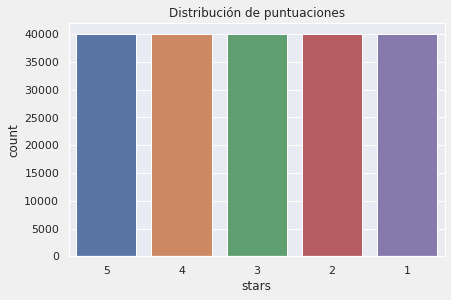

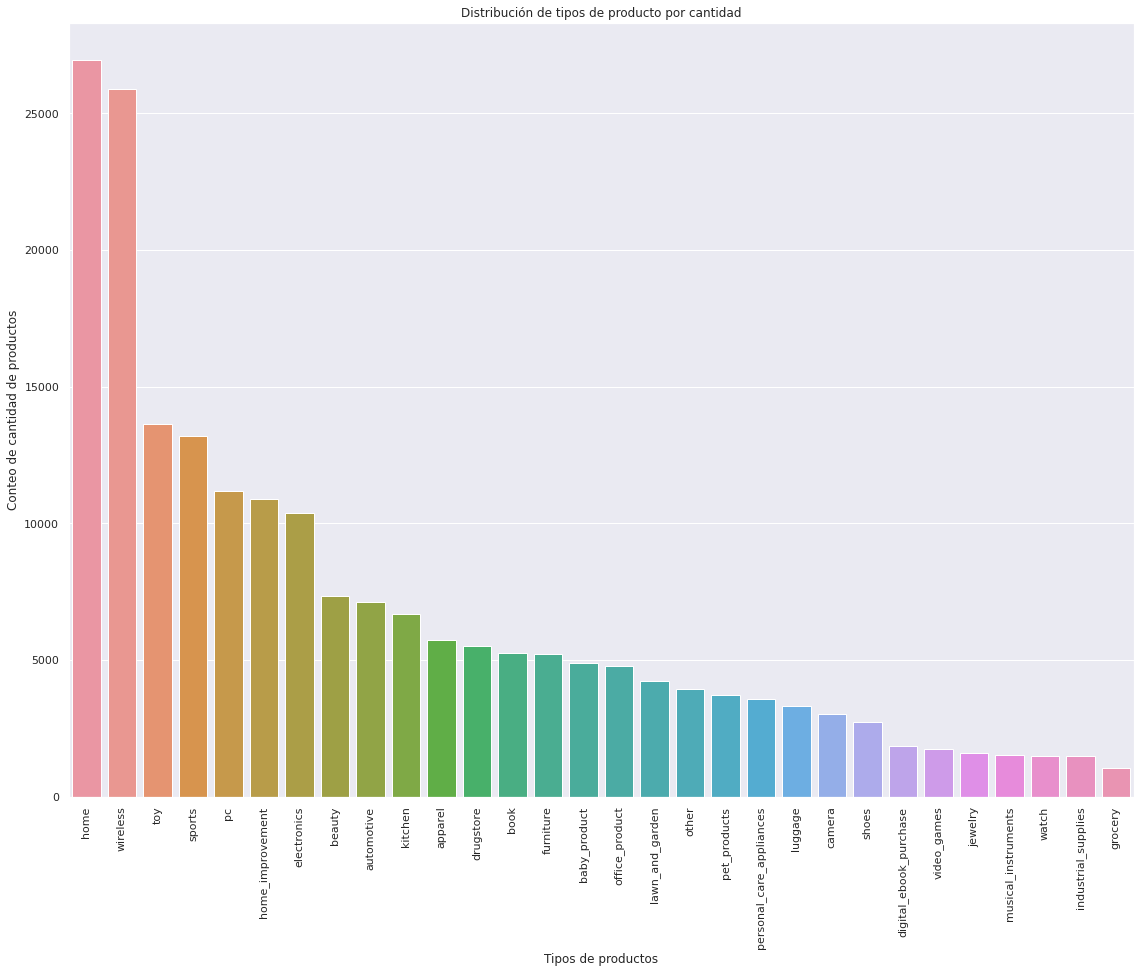

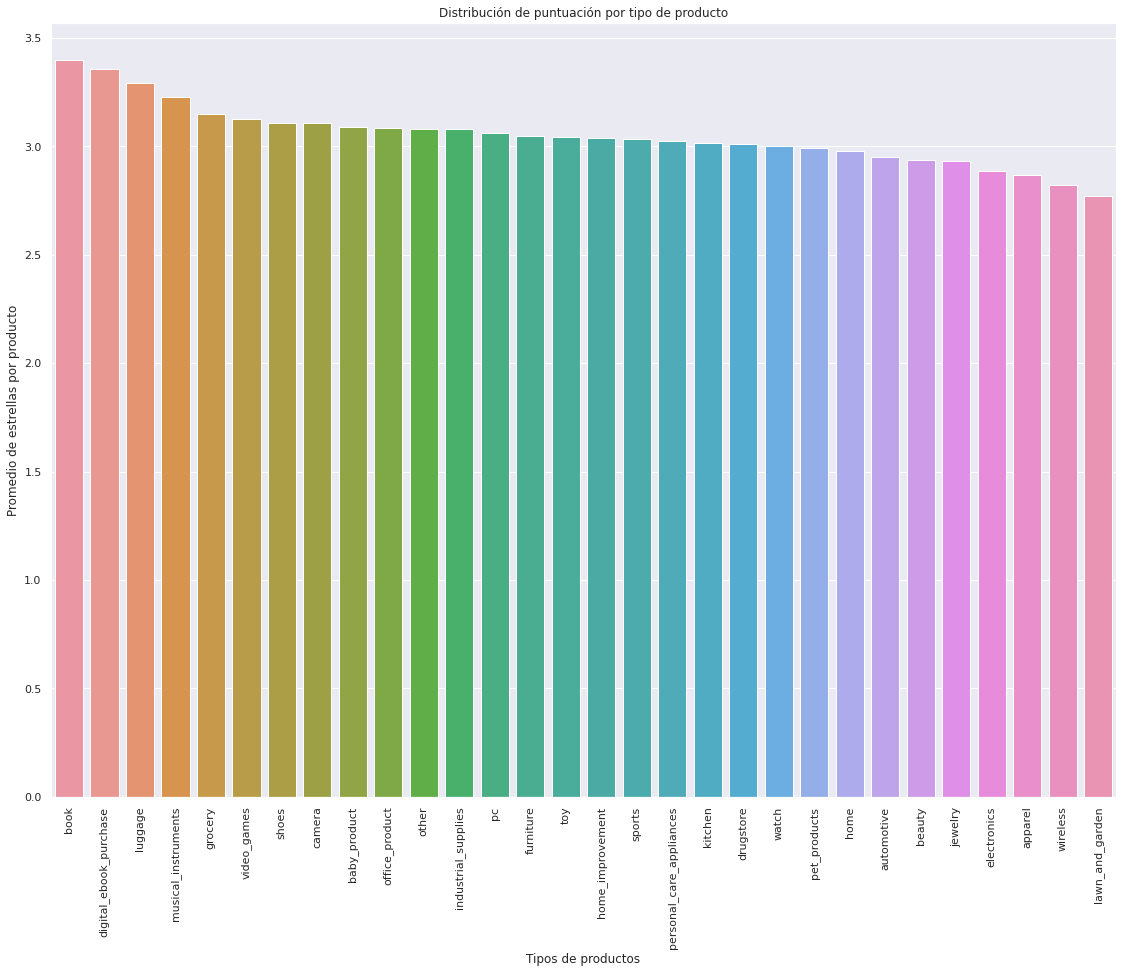

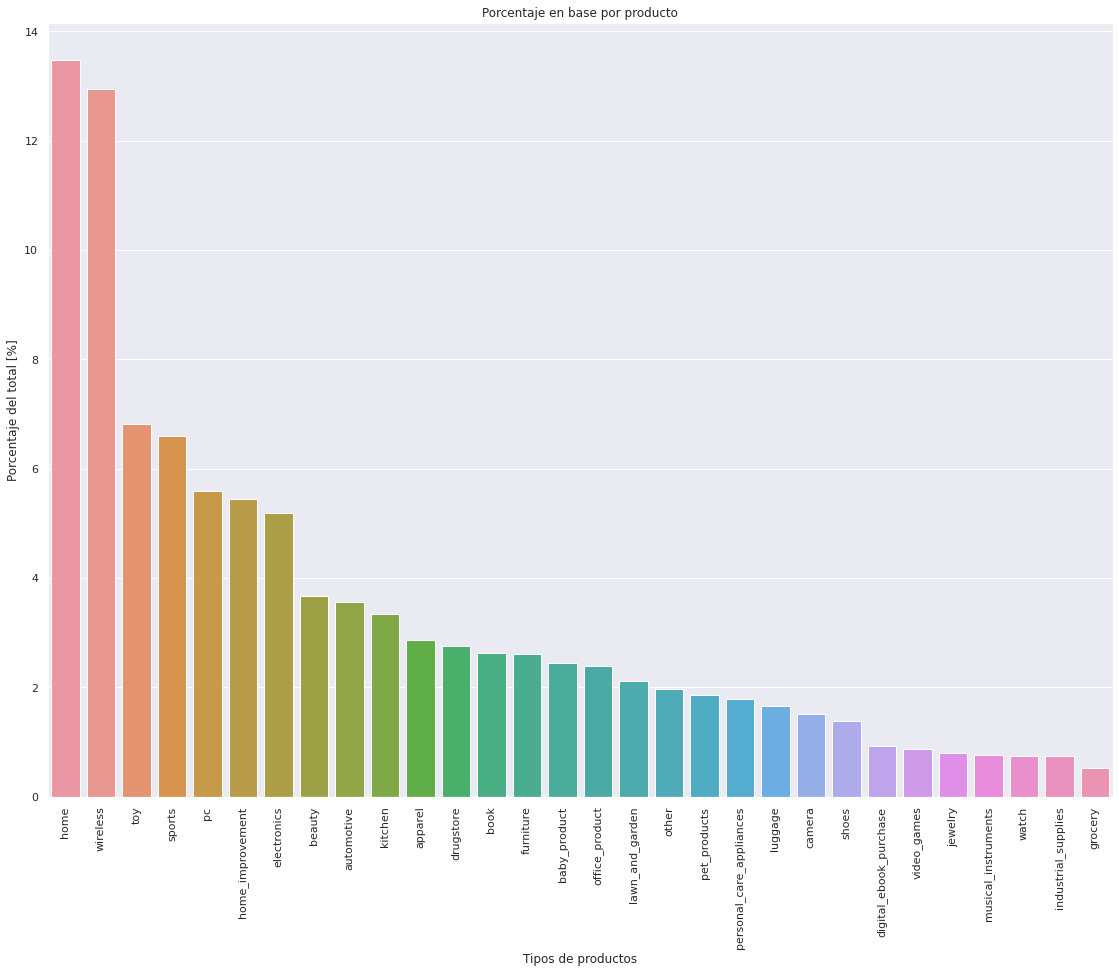

,review_id,product_id,reviewer_id,stars,review_body,review_title,language,product_category
199995,es_0715276,product_es_0317036,reviewer_es_0643604,5,Mando funciona perfectamente y cumple con toda...,Tal y como se describe,es,electronics
199996,es_0085190,product_es_0622919,reviewer_es_0466173,5,"Compré la batería con cierta reticencia, pero ...",Funciona perfectamente,es,electronics
199997,es_0484496,product_es_0358101,reviewer_es_0330744,5,Buena calidad. Satisfecha con la compra.,Buena calidad.,es,apparel
199998,es_0930141,product_es_0788855,reviewer_es_0694290,5,Perfecto para el cumple de mi hijo,Recomendado,es,toy
199999,es_0859809,product_es_0378794,reviewer_es_0141717,5,"Súper bien! Las brochas son buenas, no sé meno...",Preciosas,es,home


In [ ]:
datos = data_train # Carga de datos.
print('-------Train Data Set-------')
print('')
#-------------------------
#Exploro dataset_es_train:
#-------------------------
n_filas = datos.shape[0]                         #Numero de filas en mi data set.
print('-------------------------------------')
print('Tamaño del data set', datos.shape)
print('-------------------------------------')
print('')
idiomas = datos.language.unique()                #Chequeo la cantidad de idiomas distintos de las reviews por las dudas. 
                                                      #(la descripción de los ds en GitHub me generaron dudas).
product_categ = datos.product_category.unique()  #Verifico los tipos de verticales (productos) de productos que hay en las reviews.
                                                      #(la idea es hacer un countplot mas prolijo después)
estrellas = datos.stars.unique()                 #Verifico la cantidad de estrellas.

# Ejecuto los prints de la info que extraje mas arriba:

print('-----------------------------------------')
print('Idiomas distintos en el data set', idiomas)
print('-----------------------------------------')
print('')
print('--------------------------------------')
print('Verticales de productos', product_categ)
print('--------------------------------------')
print('')
print('-------------------------------')
print('Puntaje de Estrellas', estrellas)
print('-------------------------------')
print('')
print('-------------------------------------')
print('Información adicional de la base')
print('-------------------------------------')
info = datos.info();                             #Cheque información adicional del data frame. 
print('')


## Datos faltantes:

# Nombres de las clumnas:
nombre_columnas = datos.columns # Me armo un vector con los nombres de las columnas

print('---------------------------------------------------------------------------------------------------------')
print('Nombres de las columnas ',nombre_columnas)  # Imprimo los nombres para mirar como los indica.
print('---------------------------------------------------------------------------------------------------------')

bool_mat = datos.isna() # Crea data frame de booleans donde un true es un blank y un false es que existe un dato.

#Ahora voy recorriendo con un for loop el nombre de cada columna y sumo todos los faltantes en cada columna. 

for nombre in nombre_columnas: # Voy iterando el nombre del vector nombre_columnas con un for.
    print('Falantes en: ',nombre,': ',sum(bool_mat[nombre]),' valores.')

print('')
## Exploración gráfica: 
scale = 5 #escala de los gráficos.
#La idea acá es tener una visualización cuantitativa de las columnas que describen al data set:

## Distribución de la puntuación.
plt.figure()
sns.set(rc={'figure.figsize':(12+scale,8.27+scale)})
plt.title('Distribución de puntuaciones')
sns.countplot(x = "stars", data = datos, order = datos["stars"].value_counts().index)

## Distribución por tipos de productos:
plt.figure()
sns.set(rc={'figure.figsize':(12+scale,8.27+scale)})
sns.countplot(x = "product_category", data = datos, order = datos["product_category"].value_counts().index)
plt.xticks(rotation = 90)       # Roto las etiquetas para que se vea.
plt.title('Distribución de tipos de producto por cantidad')
plt.xlabel('Tipos de productos')
plt.ylabel('Conteo de cantidad de productos')
plt.show()

# Cuento la cantidad total por tipos de producto:
cantidad = []
for producto in product_categ:
  prod_total = datos[(datos['product_category']==producto)].shape[0]
  cantidad.append(prod_total)

myList = cantidad
myInt = n_filas
newList = [round((x / myInt)*100,2) for x in myList]

c = {'Producto': product_categ, 'Nº total por producto': myList,'Porcentaje del total [%]': newList}
data_tot = pd.DataFrame(c)
data_tot = data_tot.sort_values(by=['Porcentaje del total [%]'], ascending=False, ignore_index=True)

## Distribución de puntuaciones promedio por tipo de producto:

#Calculo los promedios de pubntaje para cada producto:
promedios = []
for producto in product_categ:
    data_prod = datos[(datos['product_category']==producto)]
    prom = data_prod['stars'].mean()
    promedios.append(prom)

d = {'Producto': product_categ, 'Puntaje promedio': promedios}
data_proms = pd.DataFrame(d)
data_proms = data_proms.sort_values(by=['Puntaje promedio'], ascending =False, ignore_index=True)

## Graficos totales y promedios:

plt.figure()
sns.set(rc={'figure.figsize':(12+scale,8.27+scale)})
sns.barplot(x = 'Producto', y = 'Puntaje promedio', data = data_proms)
plt.xticks(rotation = 90)       # Roto las etiquetas para que se vea.
plt.title('Distribución de puntuación por tipo de producto')
plt.xlabel('Tipos de productos')
plt.ylabel('Promedio de estrellas por producto')
plt.show()

plt.figure()
sns.set(rc={'figure.figsize':(12+scale,8.27+scale)})
sns.barplot(x = 'Producto', y = 'Porcentaje del total [%]', data = data_tot)
plt.xticks(rotation = 90)       # Roto las etiquetas para que se vea.
plt.title('Porcentaje en base por producto')
plt.xlabel('Tipos de productos')
plt.ylabel('Porcentaje del total [%]')
plt.show()

## Visualizo heads y tail de cada df:
#datos.head()                         ## No aporta mucha info.
datos.tail()                         ## No aporta mucha info.
#data_proms.head()           
#data_tot.head()                       ## Esta si aporta: Da una idea general de la composición del data set por vertical (tipo de proucto.)
## NOTA:
# TENGO QUE ELEGIR CON QUE TIPO DE PRODUCTO ME QUEDO, O SI LO HAGO CON TODOS Y DESPUES QUE BSAE DE DATOS USO.

## En este punto, me interesa responder la siguiente pregunta para el data set mas popular que es el de train (**Nota**: Solo voy a tratar de responderla con el data set mas numeroso de todos. De conseguir conclusiones interesantes, consideraré extrapolar la solución a los otros dos data sets.):

- ***¿Qué palabras están asociadas a calificaciones positivas y qué palabras a calificaciones negativas?***

Para eso me voy a tratar de conocer la frecuencia de las palabras de los mejores reviews (**5 estrellas de puntuación**) y las voy a comparar contra la frecuencia de palabras de los peores reviews (**1 estrella de puntuación**).



(5391, 2)
Puntuación: 1


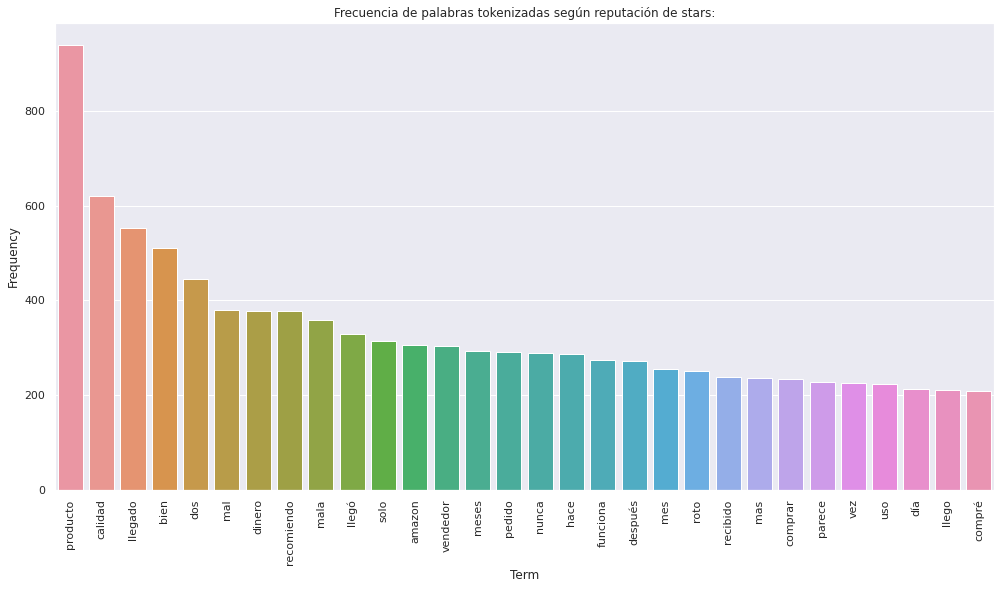

(9515, 2)
       Term  Frequency
0  producto        939
1   calidad        620
2   llegado        554
3      bien        511
4       dos        445
(5542, 2)
Puntuación: 2


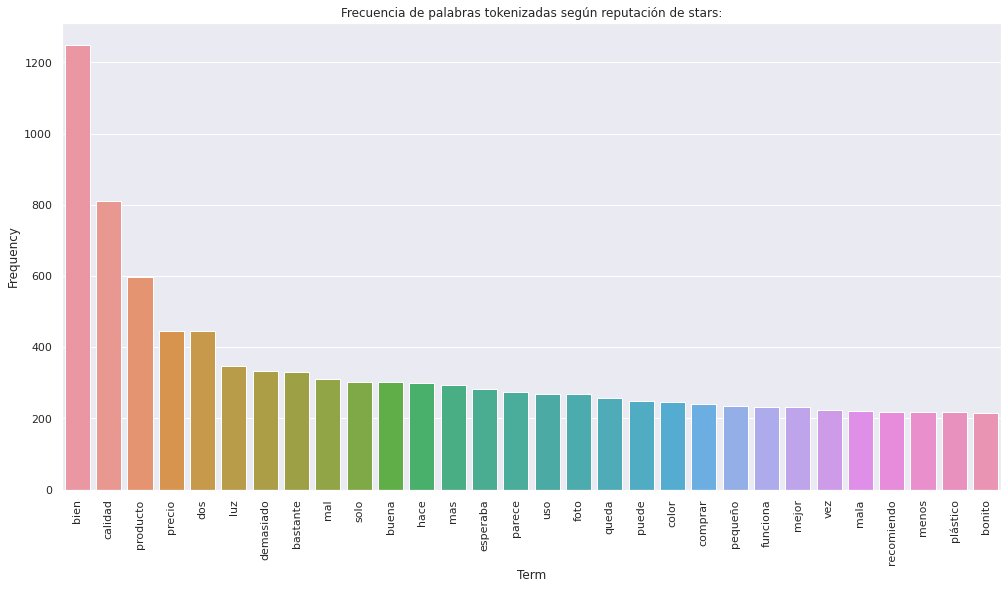

(10404, 2)
       Term  Frequency
0      bien       1248
1   calidad        811
2  producto        596
3    precio        446
4       dos        446
(5477, 2)
Puntuación: 3


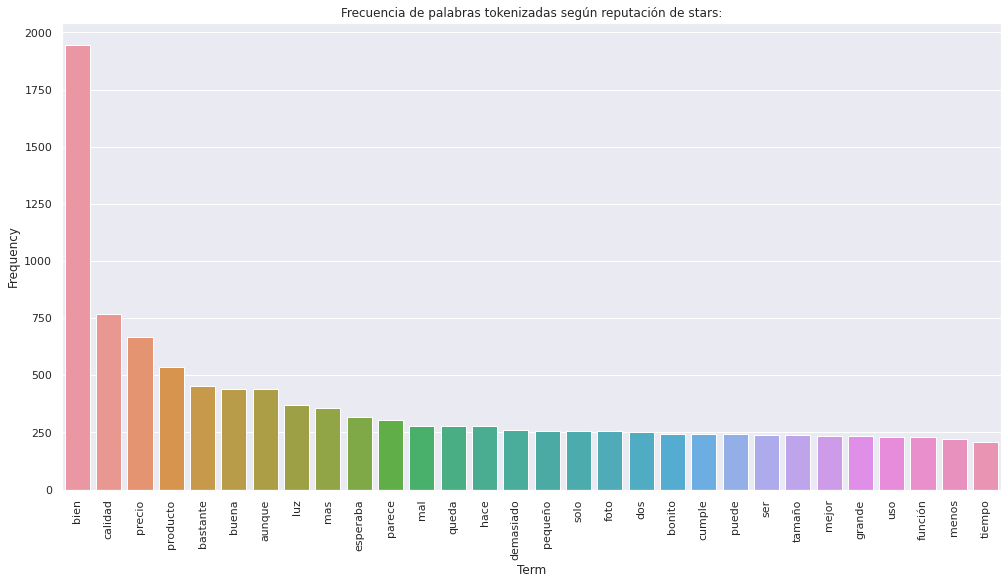

(9873, 2)
       Term  Frequency
0      bien       1944
1   calidad        768
2    precio        668
3  producto        538
4  bastante        454
(5309, 2)
Puntuación: 4


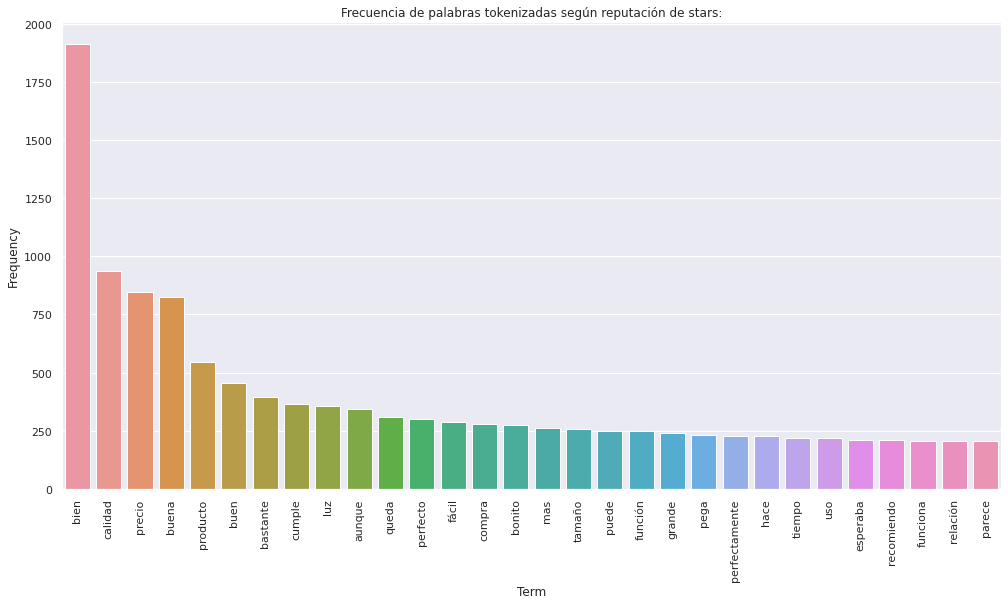

(8926, 2)
       Term  Frequency
0      bien       1911
1   calidad        938
2    precio        847
3     buena        827
4  producto        544
(5243, 2)
Puntuación: 5


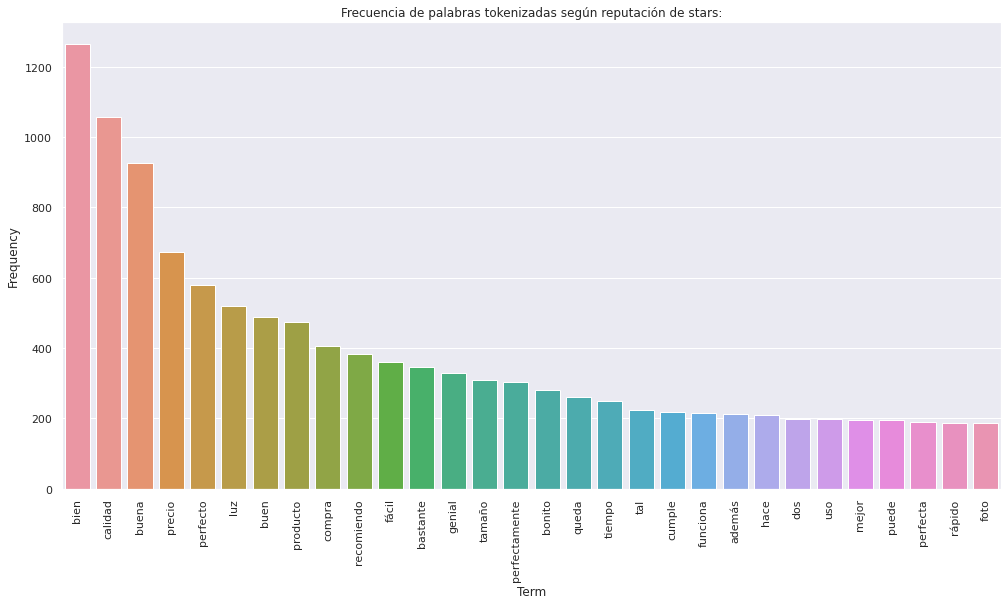

(8798, 2)
       Term  Frequency
0      bien       1263
1   calidad       1056
2     buena        926
3    precio        672
4  perfecto        579


In [ ]:
## Ciclo las 5 tipos de estrellas para ver que palabras son las que más se repiten:

stars = [1,2,3,4,5]
#stars = [1]

#data_train = data_train[(data_train['product_category'].isin(('home','wireless','toy')))]

# Tomando el dominio más popular:
data_train = data_train[(data_train['product_category'] == 'home')]

for star in stars:
## Empiezo con las peores reviews:
  data_rev_malo = data_train[(data_train.stars == star)]  #Tomo las peores/mejores reviews.
  data = data_rev_malo[['review_body','stars']]        #Me quedo con el cuerpo de la review y el puntaje.
  print(data.shape) # Tomo 20% del DS de train.
  data.head()
  ## Comienzo a procesar las reviews y calculo la frecuencia para las malas:
  tokenizer = RegexpTokenizer(r'\w+') #r'\w+' #Inicializo tokenizador.
  todos_reviews_malos = []
  for i in range(data.shape[0]):
      review = data['review_body'].iloc[i]                       #seleccionar cada review
      review = review.lower()                                    #Normalizo pasando a minusculas.
      review = re.sub(r'\d+','', review)                         #Me saco los numeros de ensima.
      review =  tokenizer.tokenize(review)                       #Tokenizar con RegexpTokenizer
      review = [palabra for palabra in review if len(palabra)>2] #Elimino las palabras de menos de 3 letras
      # Filtrar por stopwords
      review_sin_sw = []
      for palabra in review:
          if palabra not in stops:
             review_sin_sw.append(palabra)
      todos_reviews_malos.append(review_sin_sw) #agregar el resultado a la lista
  #n_grams = list(ngrams(todos_reviews_malos, 2))
  #n_grams
  #Chequeo que se haya heho bien el proceso anterior:
  #todos_reviews_malos[34] # Lo hace bien. Pude sacarle los numeros y signos de puntuación y espacios.
  #Calculo la frecuencia de cada palabra:
  todos_reviews_malos = list(itertools.chain(*todos_reviews_malos)) #convierte una lista de listas en una unica lista
  freq_bad_revs = nltk.FreqDist(todos_reviews_malos) # Reviso la frecuencia de las palabras de los titulos sin sarcasmo.
  freq_bad_revs = dict(freq_bad_revs)
  # Convierto a df:
  df_fdist = pd.DataFrame(freq_bad_revs.items()) # Hay que ponerle el metodo items()
  df_fdist.columns = ['Term','Frequency']
  df_bad_revs = df_fdist
  df_bad_revs.sort_values(by = ['Frequency'],ascending= False, inplace= True ) # ordenar por frecuencia
  df_bad_revs.reset_index(drop = True, inplace=True)
  # Grafico:
  plt.figure(figsize = (15,8))
  plot = sns.barplot(x  = df_bad_revs['Term'].iloc[:30], y = df_bad_revs['Frequency'].iloc[:30])
  print('Puntuación:', str(star))
  plt.title('Frecuencia de palabras tokenizadas según reputación de stars:')
  for item in plot.get_xticklabels():
     item.set_rotation(90)
  plt.show()
  print(df_bad_revs.shape) # 
  print(df_bad_revs.head()) #voy chequeando para que no me pase la gran pantera rosa. Todo Ok.

# Primeras conclusiones de la base **data_train**:
- Contiene reviews de un solo idioma: ***español***
- Se puntea con estrellas de **1 a 5**. (Esto ya se sabe de antes, pero vale la pena aclararlo).
- El data set no tiene ***valores faltanes***.
- La distribución de los puntajes es estrellas es uniforme:
    - Esto quiere decir que los puntajes de estrellas están balanceados en el data set (Misma cantidad de 1,2,3,4,y,5).
- Existen reviews de 30 productos diferentes (30 categorías o ***verticales*** distintas):
    - La vertical más numerosa es "home" con el 13.5% del total. La siguen "wireless" con el 13%, "toy" con el 6.82%, "sports" con el 6.59% y "pc" con el 5.6%.

- La frecuencia de las palabras que más se repiten a priori es similar en los reviews con mala puntuación y buena puntiuación. Las que mas se repiten en ambos mundos son (sin lemmatizar ni stemming, solo con un normalizado):

Para TODA LA DATA EN GENERAL:

  - ***Reviews de 1 star:*** 
    - producto con 7219 repeticiones.
    - bien con 4448 repeticiones.
    - calidad	con 4349 repeticiones.
  
  - ***Reviews de 5 stars:***
    - bien con 9333 repeticiones.
    - calidad	con 8263 repeticiones.
    - buena	con 6852 repeticiones.

Comparando ambos reviews parece que las palabras que mas se repiten, **bien y calidad** figuran en ambas reviews, pero entre estas dos categorías estas dos palabras aparecen mas veces (con mayor frecuencia) en las reviews buenas. De todas formas, si se fuera a construir un modelo de clasificación con esta info "débil", nos etaríamos perdiendo info valiosa sobre el rol que esta cumpliendo la palabra. Como vemos, ambas categorías "buenas" y "malas" contienen las mismas palabras, pero la diferencia es el **rol** des esta palabra en la oración. De esta forma, solo con una tokenización, esto no se puede apreciar.

Voy a ver como se comporta esta frecuenta, si se agrega un proceso de **stemming e invstigar la posibilidad de agregar POS**, para agregar el rol de la palabra en la oración.



## Stemming y Frecuencia de aparición de palabras:
- La idea acá es ver como cambia la frecuencia de las palabras con la raíz de la misma, para ver si, entre reviews buenas y malas, cambia el scoring de frecuencias y así poder tener un ds mas marcado para poder entrenar el modelo.
- Investigar la posibilidad de realizar un POS dentro del marco de la lemmaatization.

(5391, 2)
                                          review_body  stars
5   Jamás me llegó y el vendedor nunca contacto co...      1
10  Pone que son 4 piezas y la realidad es que es ...      1
11  Saltan los plomos al tercer día de uso. A devo...      1
31  No me ha gustado de hecho la devolví . Súper p...      1
35  Por más que busque, no le encuentro el agujero...      1
1


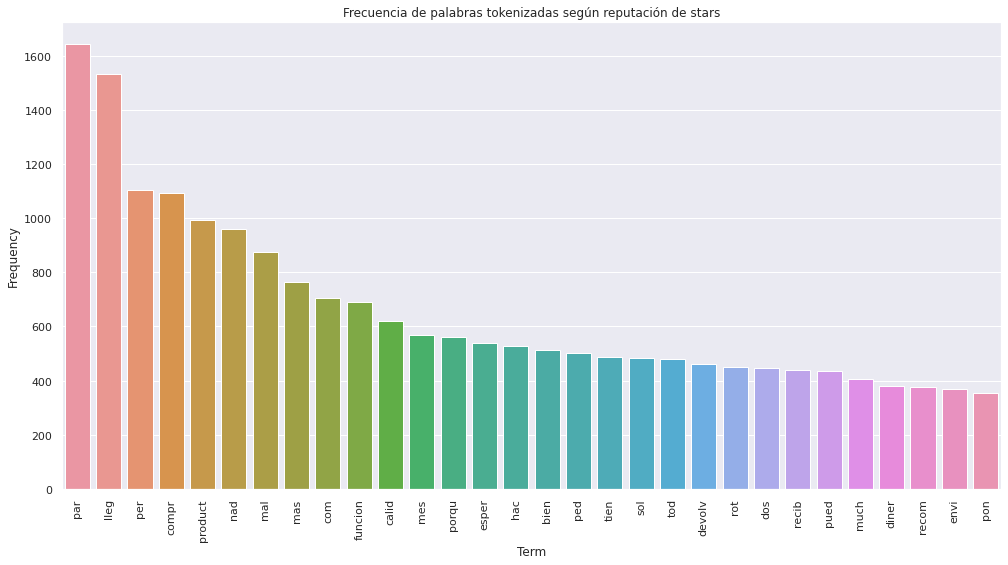

(4540, 2)
      Term  Frequency
0      par       1642
1     lleg       1533
2      per       1106
3    compr       1092
4  product        993
(5542, 2)
                                             review_body  stars
40005  Al principio muy bien, pero perdió la adherenc...      2
40008                     Es una luz azulada y no blanca      2
40038  No lo recomiendo, el acrílico es muy delgado y...      2
40044  El articulo en cuestión es exactamente lo que ...      2
40055  preciosas pero, una vez introducidas en la mac...      2
2


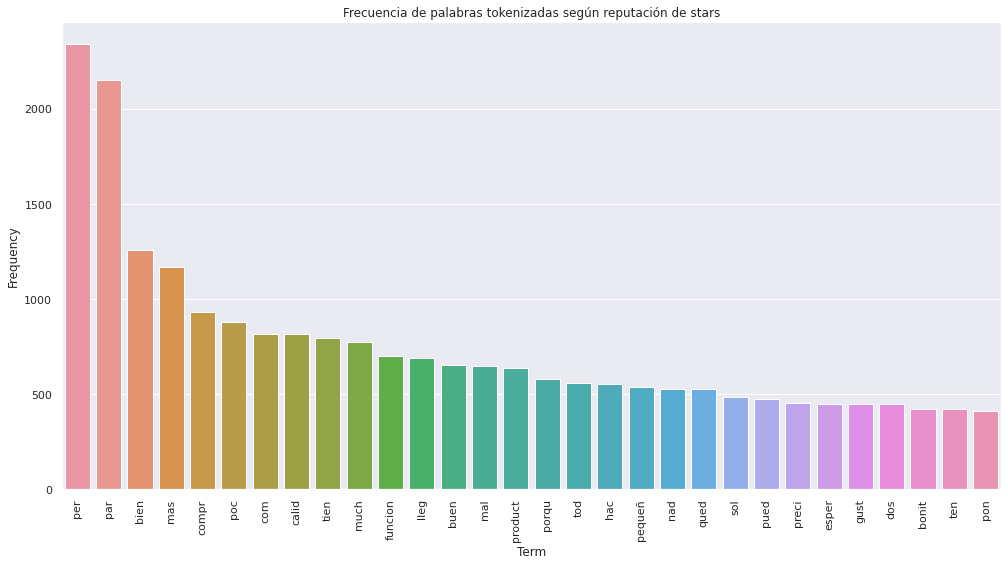

(4907, 2)
    Term  Frequency
0    per       2337
1    par       2151
2   bien       1254
3    mas       1164
4  compr        930
(5477, 2)
                                             review_body  stars
80002  La luces llegaron en tiempo y bien, las ocho f...      3
80003  No sé puede apagar, está todo el rato consumie...      3
80004  Vino sin la goma ajustable en la tapa y si pon...      3
80016  El modelo esta muy bien , pero la luz mas tenu...      3
80023  Es dificil de instalar. No hay sitio para los ...      3
3


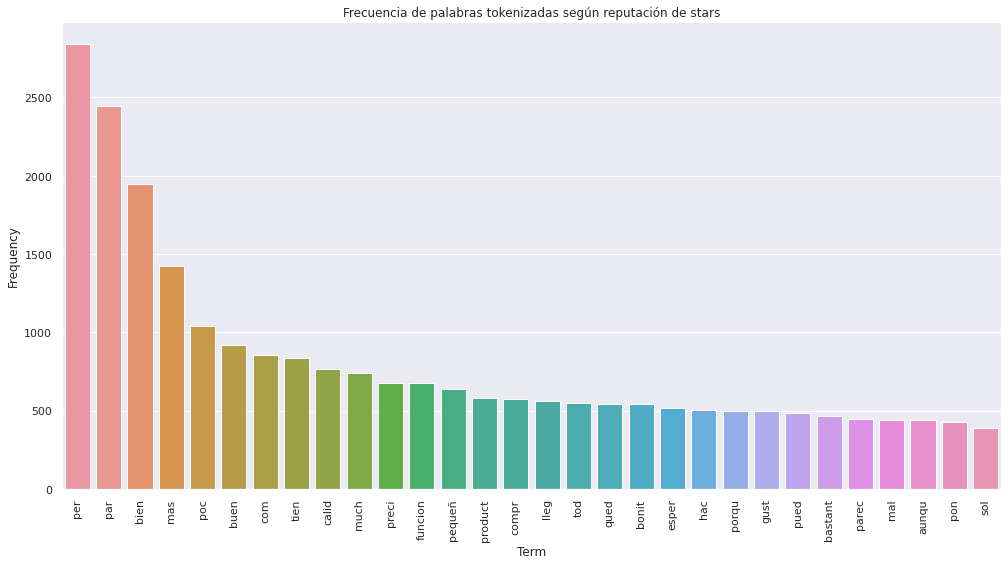

(4705, 2)
   Term  Frequency
0   per       2838
1   par       2442
2  bien       1947
3   mas       1423
4   poc       1039
(5309, 2)
                                              review_body  stars
120003  Queda muy bien, material duradero y tamaño per...      4
120007  Es de plástico regulero, parece q se va a romp...      4
120011  Da un toque muy elegante y además es práctico ...      4
120014  Yo vivo en una zona costera de mucha humedad y...      4
120026  Me ha gustado mucho es igual que la foto es mu...      4
4


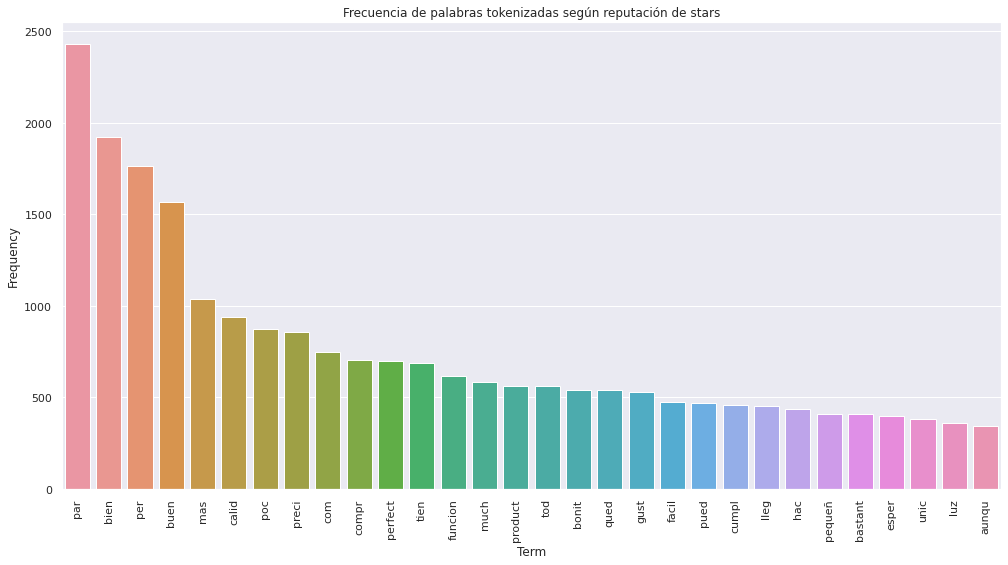

(4430, 2)
   Term  Frequency
0   par       2428
1  bien       1922
2   per       1764
3  buen       1566
4   mas       1035
(5243, 2)
                                              review_body  stars
160001  Cumple su función calidad precio bien. Buen ma...      5
160019  No es el tipico objeto que moleste en la cocin...      5
160027           Es muy cómoda y tiene bastante capacidad      5
160030  Muy bonita y muy buen material. El aguar fría ...      5
160044  Estoy muy contenta con ella, ya tenía otra y l...      5
5


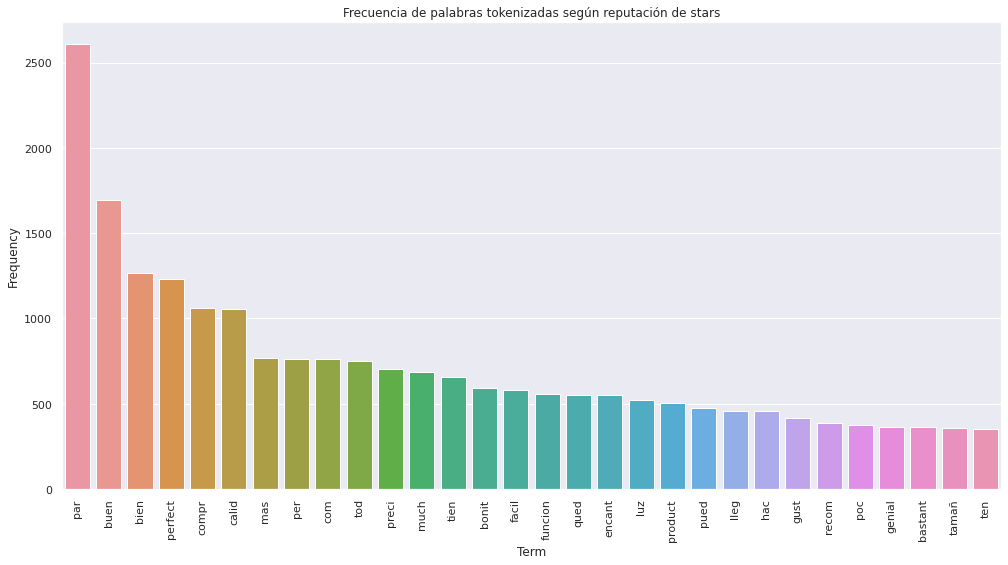

(4375, 2)
      Term  Frequency
0      par       2606
1     buen       1691
2     bien       1267
3  perfect       1231
4    compr       1058


In [ ]:
## Vuelvo a cargar el data set de train por comodidad:
  #----------------
  # Recordemos que:
    ##data_train.stars == 1 # Las peores reviews:
    ##data_train.stars == 5 # Las mejores reviews:
  #----------------

stars = [1,2,3,4,5]

spanish_stemmer = SnowballStemmer('spanish')
#wordnet_lemmatizer = WordNetLemmatizer('Spanish') # wln NO TIENE SPANISH
tokenizer = RegexpTokenizer(r'\w+') #r'\w+' #Inicializo tokenizador.

for star in stars:
  data_rev_malo = data_train[(data_train.stars == star)]  #Tomo las peores/mejores reviews.
  data = data_rev_malo[['review_body','stars']]        #Me quedo con el cuerpo de la review y el puntaje.
  print(data.shape) # Tomo 20% del DS de train.
  print(data.head())
  ## Comienzo a procesar las reviews y calculo la frecuencia para las malas:
  todos_reviews_malos = []
  for i in range(data.shape[0]):
      review = data['review_body'].iloc[i]                       #seleccionar cada review
      review = review.lower()                                    #Normalizo pasando a minusculas.
      review = re.sub(r'\d+','', review)                         #Me saco los numeros de ensima.
      review =  tokenizer.tokenize(review)                       #Tokenizar con RegexpTokenizer
      review = [palabra for palabra in review if len(palabra)>2] #Elimino las palabras de menos de 3 letras.
      review = [spanish_stemmer.stem(w) for w in review]         #Stemizado de los reviews.
      # Filtrar por stopwords
      review_sin_sw = []
      for palabra in review:
         if palabra not in stops:
             review_sin_sw.append(palabra)
      todos_reviews_malos.append(review_sin_sw) #agregar el resultado a la lista
      #Chequeo que se haya heho bien el proceso anterior:
      #todos_reviews_malos[34] # Lo hace bien. Pude sacarle los numeros y signos de puntuación y espacios.
      # Calculo la frecuencia de cada palabra:
  todos_reviews_malos = list(itertools.chain(*todos_reviews_malos)) #convierte una lista de listas en una unica lista
  freq_bad_revs = nltk.FreqDist(todos_reviews_malos) # Reviso la frecuencia de las palabras de los titulos sin sarcasmo.
  freq_bad_revs = dict(freq_bad_revs)
  # Convierto a df:
  df_fdist = pd.DataFrame(freq_bad_revs.items()) # Hay que ponerle el metodo items()
  df_fdist.columns = ['Term','Frequency']
  df_bad_revs = df_fdist
  df_bad_revs.sort_values(by = ['Frequency'],ascending= False, inplace= True ) # ordenar por frecuencia
  df_bad_revs.reset_index(drop = True, inplace=True)
  # Grafico:
  plt.figure(figsize = (15,8))
  plot = sns.barplot(x  = df_bad_revs['Term'].iloc[:30], y = df_bad_revs['Frequency'].iloc[:30])
  print(star)
  plt.title('Frecuencia de palabras tokenizadas según reputación de stars')
  for item in plot.get_xticklabels():
      item.set_rotation(90)
  plt.show()
  print(df_bad_revs.shape) # 
  print(df_bad_revs.head()) #voy chequeando para que no me pase la gran pantera rosa. Todo Ok.


## Resultados de normalizado, eliminado de stop words y espacios (re), y stemmizado:

Se determinan las frecuencias de las 5 palabras mas repetidas para: 

**Malos reviews - Puntaje de stars == 1:**

- 1º)	par	= 12554
- 2º)	lleg =	9655
- 3º)	per	 = 8749
- 4º)	compr	= 8460
- 5º)	product	= 7684

**Buenos reviews - Puntaje de stars == 2:**

Term	Frequency
- 1º) per	= 17252
- 2º) par	= 16476
- 3º)	bien =	9662
- 4º) mas	= 8575
- 5º) compr	= 6918


**Buenos reviews - Puntaje de stars == 3:**

Term	Frequency
- 1º) per	= 20258
- 2º) par	= 17894
-	3º) bien =	13991
- 4º) mas	= 9845
- 5º) buen = 7402

**Buenos reviews - Puntaje de stars == 4:**

Term	Frequency
- 1º) par	= 18334
- 2º) bien = 14272
- 3º) per	= 13092
- 4º) buen = 12777
- 5º) mas =	7674


**Buenos reviews - Puntaje de stars == 5:**

- 1º)	par =	18422
- 2º)	buen = 13543
- 3º)	perfect	= 9828
- 4º)	bien = 9375
- 5º)	calid =	8271

Se logra una diferencia apreciable entre la palabra ***par*** para ambas categorías de reviews, dado que, la diferencia entre la cantidad de veces que se repite entre los **malos reviews** y los **buenos reviews** es de 5.868 veces. Otro aspecto importante es que en el top 5 de palabras entre malos y buenos reviews, se repiten palanbras distitntas, salvo por la palabra par. Esto permite tener una diferencia mas marcada entre malos y buenos reviews.

Pero, si se mira el contexto global entre los puntajes intermedios, la cosa no está tan clara. Hay palabras que se repiten en todos los puntajes, y lo que es peor, sucede en el top 5 de palabras más repetidas.

## **Nota:** Vamos a tener que hacer algo con las palabras que se repiten. Posiblemente agregar un Método TF-IDF: Revisar las frecuencias inversas para ver cual es la palabra o las palabras que tienen más o menos relevancias en las reviews, para poder elegir bien.

# Modelado:

- Me voy a quedar con el proceso de stemming para armar la matriz para modelar en primera instancia. De todas fomras voy a lemmatizar para comparar performances.
- Me voy a quedar con el tipo de productos mas popular para hacer el modelo: ['home']
- Esto quiere decir que mi modelo va a ser "bueno" para predecir los reviews de estas tres categorías de productos, que son las mas populares. Desde un punto de vista de negocio, tiene sentido poner foco solo a los 3 productos mas "vendidos".


## Investigación: Proceso de Lemmatizing con SpaCy: Completo pre modelado.
- La idea es tener la estrategia de Lemmatizing en español utilizando la librería de Sicy que puede lematizar en español, para investigar mejoras en ACCURACY, matriz de confusión, area bajo la ROC (MULTICLASS) y F1 - SCORE.

In [ ]:
## CONSIDERAR AGARRAR PARA EL DEVELOPEMENT SOLAMNETE EL 30% DEL DATA SET.

In [ ]:
#-------------------------------------------------------------------------------
## Repito el proceso anterior para desvincularlo del proceso de EDA: Lemmatizing
#-------------------------------------------------------------------------------

data_train_prods = data_train[(data_train['product_category'] == 'home')]

data = data_train_prods[['review_body','stars']]   #Me quedo con el cuerpo de la review y el puntaje.

## Voy a tener que tomar una porción menor del data set porque los modelos y
## procesos de lemmatizing no funcionan bien:

percent = 0.2 # Elijo el 20% del Data Set: De otra forma la corrida tarda mucho y mequedo sin RAM.
data = data.sample(frac = percent, replace = True, axis = 'index') # Selecciono un 20% random de la data para hacer proceso de Lemma y Stemm, y generar el modelo con el mejor método.
print(data.shape) 
data.head()

(5392, 2)


,review_body,stars
69467,Me venían grandes por lo que no puedo opinar y...,2
148795,"De momento, funciona muchisimo mejor que las q...",4
80788,la funda esta muy bien pero a mi no me vale mi...,3
56878,"La regadera es muy bonita, y todo el esmaltado...",2
136347,"Buen producto, lleva los tornillos.",4


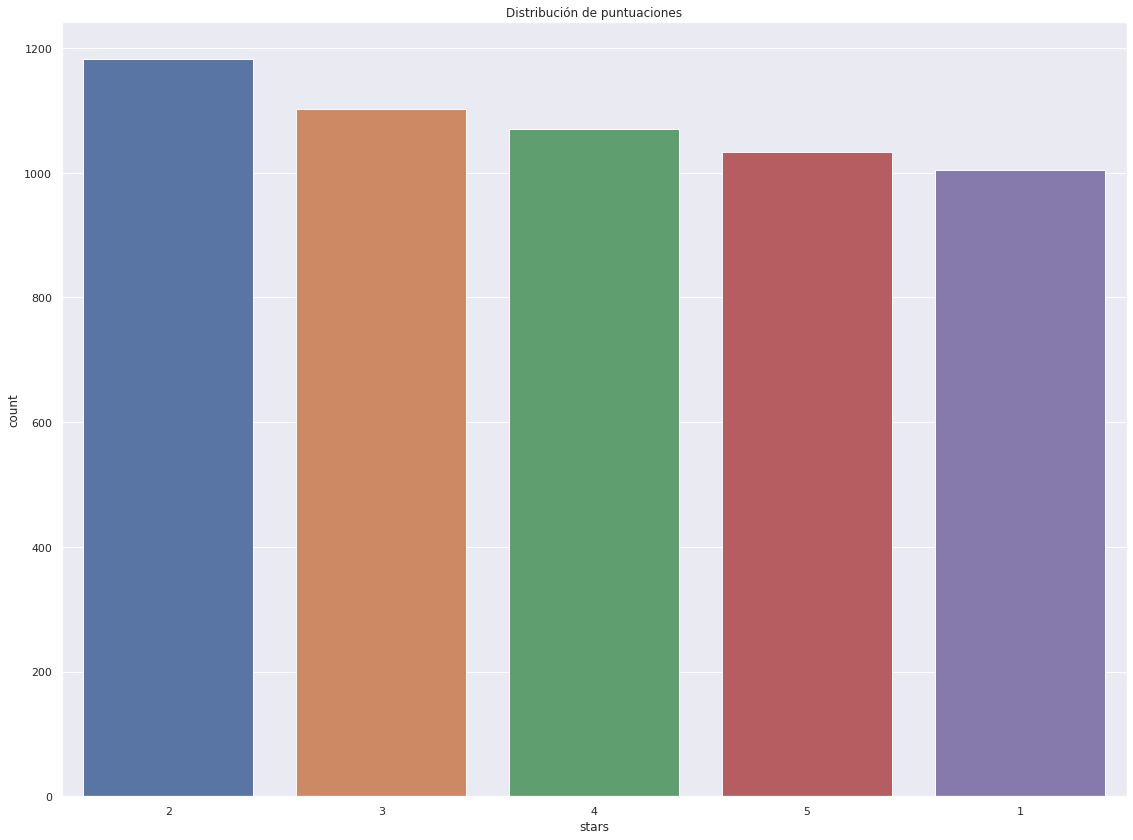

In [ ]:
## Distribución de la puntuación: Chequeo que sea una distribución uniforme:
scale = 10
plt.figure()
sns.set(rc={'figure.figsize':(12+scale,8.27+scale)})
plt.title('Distribución de puntuaciones')
sns.countplot(x = "stars", data = data, order = data["stars"].value_counts().index)

## Es bastante uniforme... Vamos bien!

In [ ]:
## Defino las herramientas de Lemmatizado y tokenizado:

nlp = spacy.load("es_core_news_sm", disable=['ner', 'parser']) # Seteo el pipeline a español: Deshabilito el ner y parser para aumentar eficiencia en la corrida
tokenizer = RegexpTokenizer(r'\w+') #r'\w+' #Inicializo tokenizador.

## Proceso todos los reviews:

todos_los_reviews_lemma= []

for i in range(data.shape[0]): 
    review = data['review_body'].iloc[i]                       #seleccionar cada review
    review = review.lower()                                    #Normalizo pasando a minusculas.
    review = re.sub(r'\d+','', review)                         #Me saco los numeros de ensima.
    review =  tokenizer.tokenize(review)                       #Tokenizar con RegexpTokenizer
    # Saco Stop Words.
    review_sin_sw = []
    for palabra in review:
        if palabra not in stops:
           review_sin_sw.append(palabra)
    review = [palabra for palabra in review_sin_sw if (palabra not in ("producto","bien","buena","precio","producto","calidad","bastante","llegado","aunque") and len(palabra)>3)] #Elimino las palabras de menos de 2 letras y las dos que más se repiten entre clases.
    #Lemmatizado de los reviews.
    review_lemma = [nlp(w) for w in review] # Aplicamos el Lemmatizer (Esto puede tardar un rato): No hace falta decirle que tipo de palabra es.
    review_lemma = ' '.join([token.text_with_ws for token in review_lemma])
    todos_los_reviews_lemma.append(review_lemma) #agregar el resultado a la lista

In [ ]:
## Agrego la culumna de reviwes stemmizados al data set original:
data["review_lemma"] = todos_los_reviews_lemma
data_model_train_lemma = data[['review_lemma','stars']]
data_model_train_lemma.dropna(axis=0,inplace=True)  # Por si quedaron titulares vacios
print(data_model_train_lemma.shape) 
data_model_train_lemma.head()

(5392, 2)


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


,review_lemma,stars
69467,venían grandes puedo opinar comprador podía ca...,2
148795,momento funciona muchisimo mejor funcionan pil...,4
80788,funda vale sofá piel levantan cojines puede en...,3
56878,regadera bonita esmaltado pintura venido agrie...,2
136347,buen lleva tornillos,4


## Proceso de Stemming con SnowBall Stemmer: Completo pre modelado.

In [ ]:
#----------------------------------------------------------------------------
## Repito el proceso anterior para desvincularlo del proceso de EDA: Stemming
#---------------------------------------------------------------------------- 
#data = data_train[['review_body','stars']]   #Me quedo con el cuerpo de la review y el puntaje.
#print(data.shape) 
#data.head()

## Defino las herramientas de stemmizado y tokenizado:
spanish_stemmer = SnowballStemmer('spanish')
tokenizer = RegexpTokenizer(r'\w+') #r'\w+' #Inicializo tokenizador.

## Proceso todos los reviews:

todos_los_reviews_stemm= []

for i in range(data.shape[0]):
    review = data['review_body'].iloc[i]                       #seleccionar cada review
    review = review.lower()                                    #Normalizo pasando a minusculas.
    review = re.sub(r'\d+','', review)                         #Me saco los numeros de ensima.
    review =  tokenizer.tokenize(review)                       #Tokenizar con RegexpTokenizer
    # Filtrar por stopwords
    review_sin_sw = []
    for palabra in review:
        if palabra not in stops:
           review_sin_sw.append(palabra)
    review = [palabra for palabra in review_sin_sw if (palabra not in ("producto","bien","buena","precio","producto","calidad","bastante","llegado","aunque") and len(palabra)>3)] #Elimino las palabras de menos de 2 letras y la que más se repiten entre reviews.
    #Stemizado de los reviews.
    review = [spanish_stemmer.stem(w) for w in review]         
    review = " ".join(review)
    todos_los_reviews_stemm.append(review) #agregar el resultado a la lista
    

In [ ]:
## Agrego la culumna de reviwes stemmizados al data set original:
data["review_stemm"] = todos_los_reviews_stemm
data_model_train_stemm = data[['review_stemm','stars']]
data_model_train_stemm.dropna(axis=0,inplace=True)  # Por si quedaron titulares vacios
print(data_model_train_stemm.shape) 
data_model_train_stemm.head()

(5392, 2)


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


,review_stemm,stars
69467,ven grand pued opin comprador pod cambi abon part,2
148795,moment funcion muchisim mejor funcion pil sol ...,4
80788,fund val sof piel levant cojin pued enganch ba...,3
56878,regader bonit esmalt pintur ven agriet abaj go...,2
136347,buen llev tornill,4


## Agrego análisis del Stemmizado y Lemmatizado con un Word Cloud:
- Quiero ver cual palabra (lemmatizada) resalta mas en función de las stars que contiene el review de forma visual antes de modelar.

In [ ]:
#Function to create wordcloud:
from wordcloud import WordCloud
def ver_wordcloud(palabras):
    text = ' '.join(palabras)
    wordcloud = WordCloud(background_color='white',width=900,height=450).generate(text.strip())
    plt.figure(figsize = (15,8), facecolor = None)
    plt.imshow(wordcloud, interpolation='kaiser')
    plt.axis("off")
    plt.show()

## Word Count Lemmatizado:

In [ ]:
stars = [1, 2, 3, 4, 5]
for star in stars:
  data_words_ = data_model_train_lemma[(data_model_train_lemma['stars'] == star)]
  print('------------------')
  print('Puntuación de star')
  print(star)
  print('------------------')
  ver_wordcloud(data_words_['review_lemma'])
  

Output hidden; open in https://colab.research.google.com to view.

## Wordk Count Stemmizado:

In [ ]:
stars = [1, 2, 3, 4, 5]
for star in stars:
  data_words_ = data_model_train_stemm[(data_model_train_stemm['stars'] == star)]
  print('------------------')
  print('Puntuación de star')
  print(star)
  print('------------------')
  ver_wordcloud(data_words_['review_stemm'])

Output hidden; open in https://colab.research.google.com to view.

## Conclusiones hasta acá:
- Se reptiten muchas palabras muchas veces en todas las stars, como la palabra **producto**.
- Voy a tener que darle pesos por la frecuencia de las mismas en el corpus.
- Para eso debería usar un **TF-IDF** para armar la matriz X.
- Voy a tener que considerar usar n-gramms.

## Pre-procesing para quedarme con las palabras que no se repien entre categorías de estrellas:

In [ ]:
## Por si necesito hacer algo para mejorar las métrcas.

## Armo la matriz esparsa con los metodos de CountVectorizer y TF-IDF Vectorizer:
- Acá voy a probar con cual de las dos técnicas es que funciona mejor.
- La idea es comparar el stemming y lemmatizing en función de los siguientes cirterios:
  - A) El que mejores métricas arroje en test una vez entrenado el modelo.
  - B) Trade off entre el proceso más barato computacionalmente hablando para armar la matrix X.
  

In [ ]:
##-------------------------------------------
## Armado de matriz:
# Voy a probar dos tecnicas de vectorización:
##-------------------------------------------
max_features = 1500 # Usaremos solo las 1000 o 2000 palabras con mas frecuencia en todo el corpus para generar los vectores

tf_dfV  = TfidfVectorizer(max_features=max_features,sublinear_tf=True, min_df=5, norm='l2', ngram_range=(1,3)) # Uso esta técnica sobre la CountVectorizer porque introduce más información.

#-----------
## STEMMING:
#-----------

list_stars = data_model_train_stemm['stars']
matriz_reviews_tf_dfV = tf_dfV.fit_transform(data_model_train_stemm['review_stemm']).toarray()


#--------------
## LEMMATIZING:
#--------------

#matriz_reviews_tf_dfV = tf_dfV.fit_transform(data_model_train_lemma['review_lemma']).toarray()
#list_stars = data_model_train_lemma['stars']

	                                                   
# Tomamos las palabras
all_words_tf_dfV  = tf_dfV.get_feature_names()

# Vizualizamos las 50 palabras mas usadas
print("50 palabras mas usadas en tf_idf: ",all_words_tf_dfV[0:50])

# Defino mi matriz de confusión: 

def confusion(ytest,y_pred):
    names=["1","2","3","4","5"]
    cm=confusion_matrix(ytest,y_pred,normalize='true')
    f,ax=plt.subplots(figsize=(5,5))
    sns.heatmap(cm,annot=True,linewidth=.5,linecolor="r",ax=ax) #fmt=".0f",
    plt.xlabel("y_pred")
    plt.ylabel("y_true")
    ax.set_xticklabels(names)
    ax.set_yticklabels(names)
    plt.show()

    return

50 palabras mas usadas en tf_idf:  ['abaj', 'abiert', 'aboll', 'abon', 'abre', 'abres', 'abri', 'abrir', 'abrirl', 'absolut', 'acab', 'acab buen', 'accesori', 'aceit', 'acept', 'acer', 'acer inoxid', 'acert', 'aciert', 'aconsej', 'acord', 'acostumbr', 'activ', 'acumul', 'adapt', 'adapt perfect', 'adecu', 'adel', 'adem', 'ademas', 'ademas pued', 'adhes', 'adhier', 'adorn', 'adquir', 'adult', 'afil', 'afloj', 'agarr', 'agost', 'agot', 'agrad', 'agrad tact', 'agradec', 'agriet', 'agu', 'agu fri', 'aguant', 'aguant pes', 'aguj']


In [ ]:
print(matriz_reviews_tf_dfV[1,:].sum())
print(matriz_reviews_tf_dfV.shape)
print(data_model_train_stemm['review_stemm'].shape)

4.1799373203305255
(5392, 1500)
(5392,)


## Train test split:


In [ ]:
## Armo los vectores para enrtrenar:
x = matriz_reviews_tf_dfV # Matriz sparse de reviews stemmizados con las 500 o 1000 0 200 palabras con mayor frecuencia.
y = list_stars # Lista de estrellas - Puntajes.
xtrain, xtest, ytrain, ytest = train_test_split(x,y,test_size=0.3,random_state=42,stratify=y)

## Benchmark:
- Voy a usar un modelo de **Naive Bayes** como benchmark para poder comparar el modelo final y optimizar hiperparámetros.
- Voy a usar **confusion matrix, accuracy y F1-SCORE** como métrica de evaluación de mis modelos, tratando de minimizar los falsos positivos y maximizando la accuracy (sin overfittear).
- Como segunda métrica de evaluación, voy a chequear los rates de true positive y negative corriendo un análisis de **ROC AUC multiclse**: Buscaré maximizxar el area bajo la ROC.
- Voy a probar varios modelos y me voy a quedar con el que cumpla los siguientes criterios:
   - 1º El que corra más rápido.
   - 2º El que arroje mejor accuracy y área bajo la ROC con los hiperparámetros por defecto.

NOTAS: 
- Tener en cuenta el XGBoost classifier.

In [ ]:
#------------------------------------------
# Defino los modelos por defecto y entreno:
#------------------------------------------

nb = GaussianNB() # Benchmark para comparar contra Linear SVC y XGboost.
nb.fit(xtrain,ytrain)

#rf = RandomForestClassifier() 
#rf.fit(xtrain,ytrain) # Tarda  mucho en fitear.

#knn = KNeighborsClassifier(n_neighbors=3)
#knn.fit(xtrain,ytrain)

svc = LinearSVC(C = 3,multi_class = 'ovr', class_weight='balanced') ## Usar un kernel no lineal. (Suport vector machines no lineales)
svc.fit(xtrain,ytrain)

#svc = LinearSVC(penalty='l2', loss='hinge', dual=True, tol=0.0001, C=10, multi_class='ovr', 
#                fit_intercept=True, intercept_scaling=1, 
#                class_weight='balanced', verbose=1,
#                random_state=None, max_iter=10000) ## Usar un kernel no lineal. (Suport vector machines no lineales)

#svc.fit(xtrain,ytrain)

#svc_non_linear = SVC(C = 10, kernel = 'poly', decision_function_shape='ovo', degree = 3, gamma = 100 ,coef0 = 0, verbose = True) 
#svc_non_linear.fit(xtrain,ytrain) ## Usaría este pero me deja sin RAM.

#------------
# Original:
#------------

#svc_non_linear = SVC(gamma = 'scale') # Primera iteración.
#svc_non_linear.fit(xtrain,ytrain)

#-------------------------------------------------------------------------------
## Iteraciones con los hiper paràmetros optimizados para el modelo SVC no linea:
#-------------------------------------------------------------------------------

#svc_non_linear = SVC(C=1, break_ties=False, cache_size=200, class_weight='balanced', coef0=2, # Segunda iteración.
#                    decision_function_shape='ovr', degree=2, gamma='scale', kernel='rbf',
#                    max_iter=-1, probability=False, random_state=None, shrinking=True,
#                    tol=0.001, verbose=False)

#svc_non_linear.fit(xtrain,ytrain)

#svc_non_linear = SVC(C=8.192186271733405, break_ties=False, cache_size=200, class_weight=None, # Tercera iteración.
#                    coef0=0.0, decision_function_shape='ovr', degree=3,
#                    gamma=0.04285513682517102, kernel='rbf', max_iter=-1, probability=False,
#                    random_state=None, shrinking=True, tol=0.001, verbose=False)

#svc_non_linear = SVC(C=10, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,    # Cuarta iteración.
#                    decision_function_shape='ovr', degree=3, gamma=0.1, kernel='sigmoid',
#                    max_iter=-1, probability=False, random_state=None, shrinking=True,
 #                   tol=0.001, verbose=False)

#svc_non_linear = SVC(C=1, break_ties=False, cache_size=200, class_weight='balanced', coef0=1, # Quinta iteración.
#                    decision_function_shape='ovr', degree=3, gamma='scale', kernel='poly',
#                    max_iter=-1, probability=False, random_state=None, shrinking=True,
#                    tol=0.001, verbose=False)

#svc_non_linear = SVC(C=5, break_ties=True, cache_size=200, class_weight='balanced', coef0=2, # Sexta iteración.
#                    decision_function_shape='ovr', degree=2, gamma='scale', kernel='rbf',
#                    max_iter=-1, probability=False, random_state=None, shrinking=True,
#                    tol=0.001, verbose=False)

#svc_non_linear = SVC(C=10, break_ties=True, cache_size=200, class_weight=None, coef0=1,      # Séptima iteración.
#                    decision_function_shape='ovr', degree=3, gamma='scale', kernel='rbf',
#                    max_iter=-1, probability=True, random_state=42, shrinking=True, tol=0.001,
#                    verbose=False)

#svc_non_linear = SVC(C=5, break_ties=False, cache_size=200, class_weight='balanced', coef0=3, # Octava iteración.
#                  decision_function_shape='ovr', degree=4, gamma='auto', kernel='poly',
#                  max_iter=-1, probability=True, random_state=42, shrinking=True, tol=0.001,
#                 verbose=False)

#svc_non_linear = SVC(C=10, break_ties=False, cache_size=200, class_weight=None, coef0=10, # Novena iteración.
#    decision_function_shape='ovr', degree=4, gamma='scale', kernel='rbf',
#    max_iter=-1, probability=True, random_state=None, shrinking=True, tol=0.001,
#    verbose=False)

svc_non_linear = SVC(C=5, break_ties=False, cache_size=200, class_weight=None, coef0=1, # Decima iteración
                    decision_function_shape='ovr', degree=2, gamma='scale', kernel='rbf',
                    max_iter=-1, probability=True, random_state=42, shrinking=True, tol=0.001,
                    verbose=False)

svc_non_linear.fit(xtrain,ytrain)

#gb =  GradientBoostingClassifier(n_estimators=100)
#gb.fit(xtrain,ytrain) # Tarda 39 min en fitiear con 1500 columnas en X: Poco práctico.

import xgboost as xgb
XGB =  xgb.XGBClassifier()
XGB.fit(xtrain,ytrain)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0,
              learning_rate=0.1, max_delta_step=0, max_depth=3,
              min_child_weight=1, missing=None, n_estimators=100, n_jobs=1,
              nthread=None, objective='multi:softprob', random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
              silent=None, subsample=1, verbosity=1)

----------------------------------------------------------------
Resultados de modelos con data Stemmizada y X armado con TF-IDF
----------------------------------------------------------------
Gauss


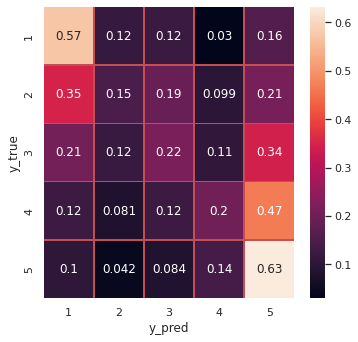

acc :  0.34487021013597036
F1 Score:  0.3228866781628774
              precision    recall  f1-score   support

           1       0.39      0.57      0.47       301
           2       0.32      0.15      0.20       355
           3       0.30      0.22      0.25       331
           4       0.35      0.20      0.26       321
           5       0.34      0.63      0.44       310

    accuracy                           0.34      1618
   macro avg       0.34      0.35      0.32      1618
weighted avg       0.34      0.34      0.32      1618

Support Vector Classifier Lineal


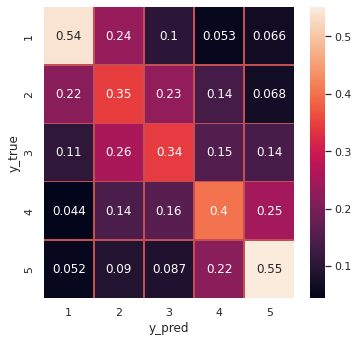

acc :  0.4326328800988875
F1 Score:  0.43510727239373137
              precision    recall  f1-score   support

           1       0.53      0.54      0.54       301
           2       0.35      0.35      0.35       355
           3       0.37      0.34      0.36       331
           4       0.41      0.40      0.41       321
           5       0.50      0.55      0.53       310

    accuracy                           0.43      1618
   macro avg       0.43      0.44      0.44      1618
weighted avg       0.43      0.43      0.43      1618

Support Vector Classifier No Lineal


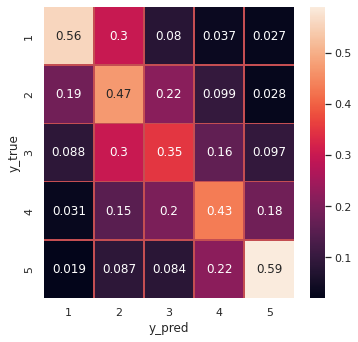

acc :  0.4777503090234858
F1 Score:  0.48349063152936667
              precision    recall  f1-score   support

           1       0.60      0.56      0.58       301
           2       0.39      0.47      0.42       355
           3       0.38      0.35      0.36       331
           4       0.45      0.43      0.44       321
           5       0.63      0.59      0.61       310

    accuracy                           0.48      1618
   macro avg       0.49      0.48      0.48      1618
weighted avg       0.48      0.48      0.48      1618

Xtreme Gradient Boost Classifier


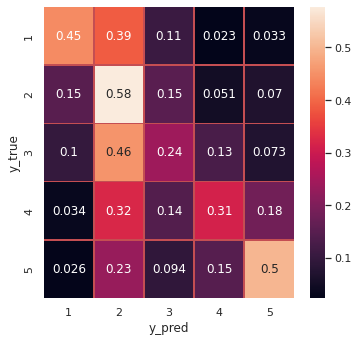

acc :  0.41718170580964153
F1 Score:  0.41849860640406894
              precision    recall  f1-score   support

           1       0.60      0.56      0.58       301
           2       0.39      0.47      0.42       355
           3       0.38      0.35      0.36       331
           4       0.45      0.43      0.44       321
           5       0.63      0.59      0.61       310

    accuracy                           0.48      1618
   macro avg       0.49      0.48      0.48      1618
weighted avg       0.48      0.48      0.48      1618



In [ ]:
# Ploteo la matriz de confusión y el accuracy:
print('----------------------------------------------------------------')
#print('Resultados de modelos con data Lemmatizada y X armado con TF-IDF')
print('Resultados de modelos con data Stemmizada y X armado con TF-IDF')
print('----------------------------------------------------------------')

#--------
## Gauss:
#--------
print('Gauss')
y_pred_nb = nb.predict(xtest)
confusion(ytest,y_pred_nb)

print("acc : ",accuracy_score(ytest, y_pred_nb))
print("F1 Score: ", f1_score(ytest ,y_pred_nb, average='macro'))
print(classification_report(ytest, y_pred_nb))

#-------------------
## Knn clasificador:
#-------------------
#print('KNN')
#y_pred_knn = knn.predict(xtest)
#confusion(ytest,y_pred_knn)

#print("acc : ",accuracy_score(ytest, y_pred_knn))

#----------------
## Random Forest:
#----------------
#print('Random Forest')
#y_pred_rf = rf.predict(xtest)
#confusion(ytest,y_pred_rf)

#print("acc : ",accuracy_score(ytest, y_pred_rf))

#------------
## LinearSVC:
#------------
print('Support Vector Classifier Lineal')
y_pred_svc = svc.predict(xtest)
confusion(ytest,y_pred_svc)

print("acc : ",accuracy_score(ytest, y_pred_svc))
print("F1 Score: ", f1_score(ytest, y_pred_svc, average='macro'))
print(classification_report(ytest, y_pred_svc))

#-----------------
## svc Non Linear:
#-----------------
print('Support Vector Classifier No Lineal')
y_pred_svcnl = svc_non_linear.predict(xtest)
confusion(ytest,y_pred_svcnl)

print("acc : ",accuracy_score(ytest, y_pred_svcnl))
print("F1 Score: ", f1_score(ytest, y_pred_svcnl, average='macro'))
print(classification_report(ytest, y_pred_svcnl))

#---------------------
## GBoost Classifier:
#---------------------
#print('Gradient Boost Classifier')
#y_pred_gb = gb.predict(xtest)
#confusion(ytest,y_pred_gb)

#print("acc : ",accuracy_score(ytest, y_pred_gb))


#---------------------
## XGBoost Classifier:
#---------------------
print('Xtreme Gradient Boost Classifier')
y_pred_XGB = XGB.predict(xtest)
confusion(ytest,y_pred_XGB)

print("acc : ",accuracy_score(ytest, y_pred_XGB))
print("F1 Score: ", f1_score(ytest, y_pred_XGB, average='macro'))
print(classification_report(ytest, y_pred_svcnl))


------------------
Puntaje de stars: 
1
------------------


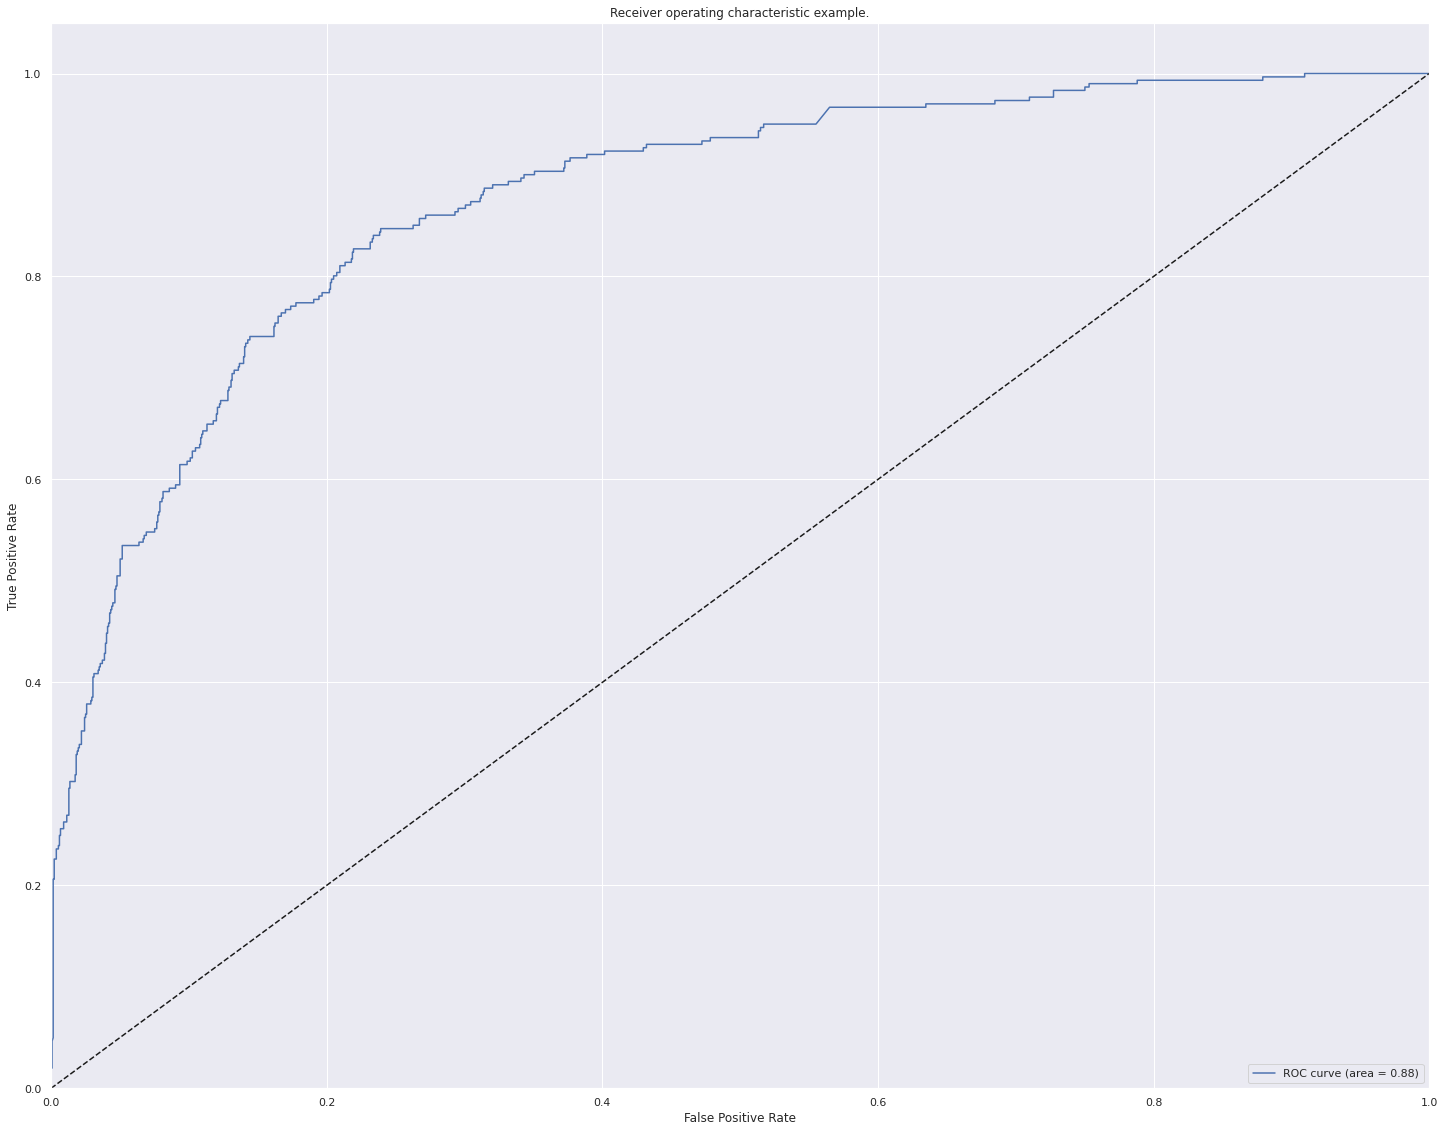

------------------
Puntaje de stars: 
2
------------------


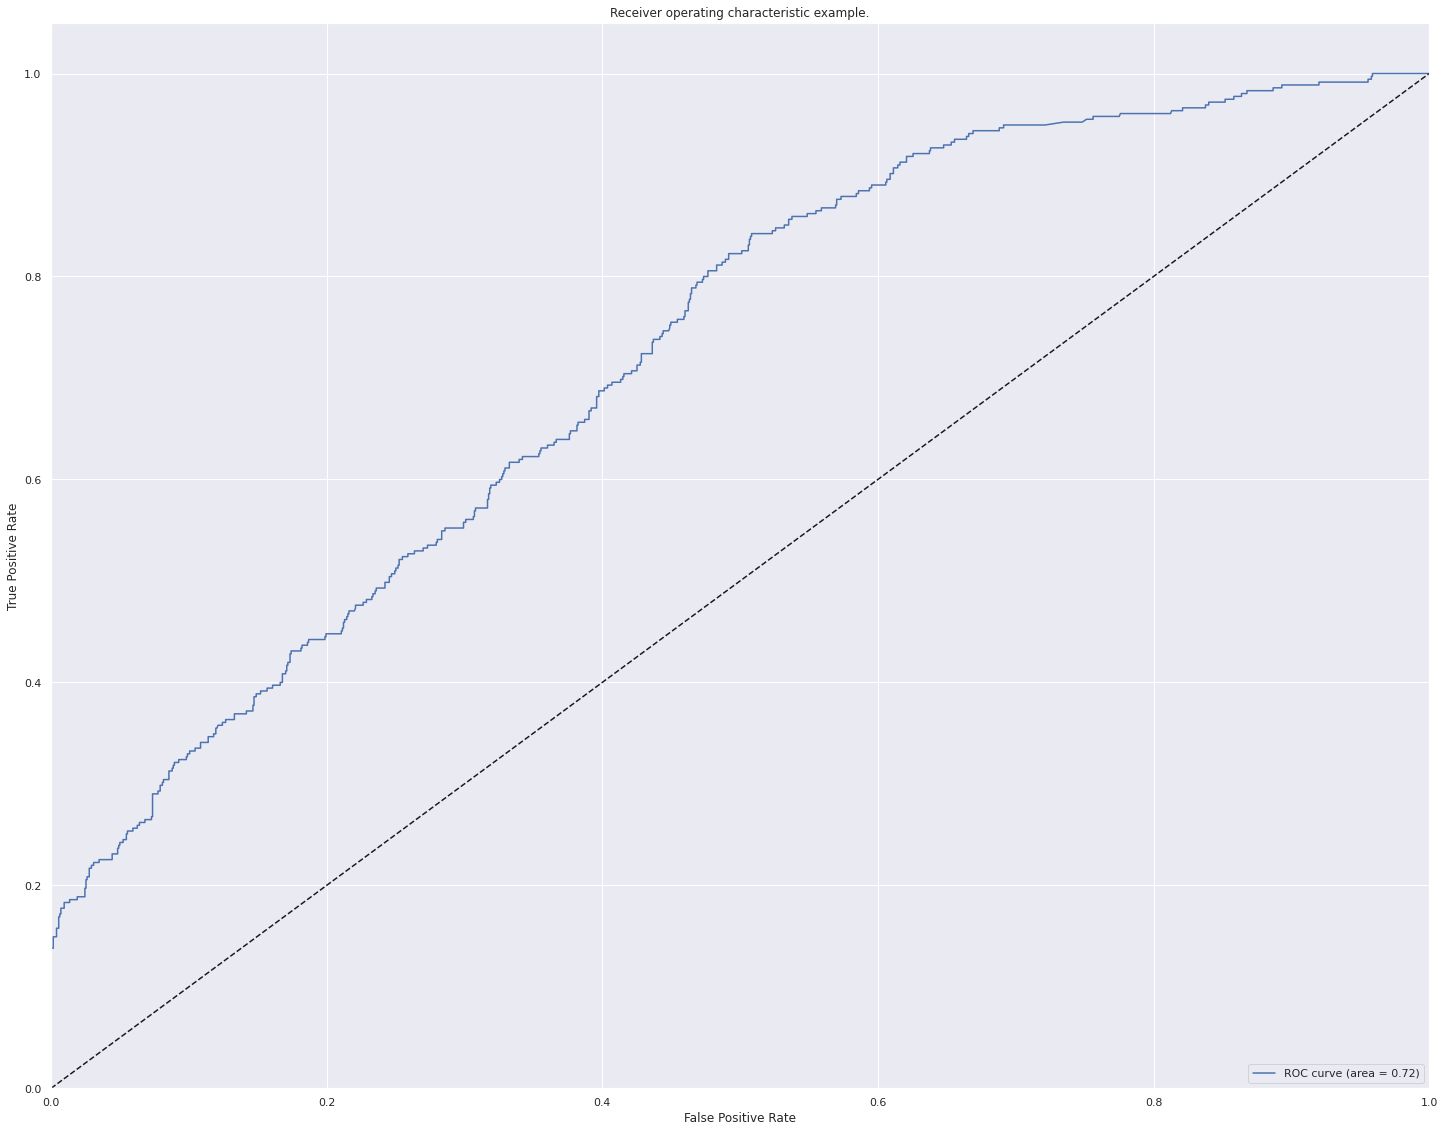

------------------
Puntaje de stars: 
3
------------------


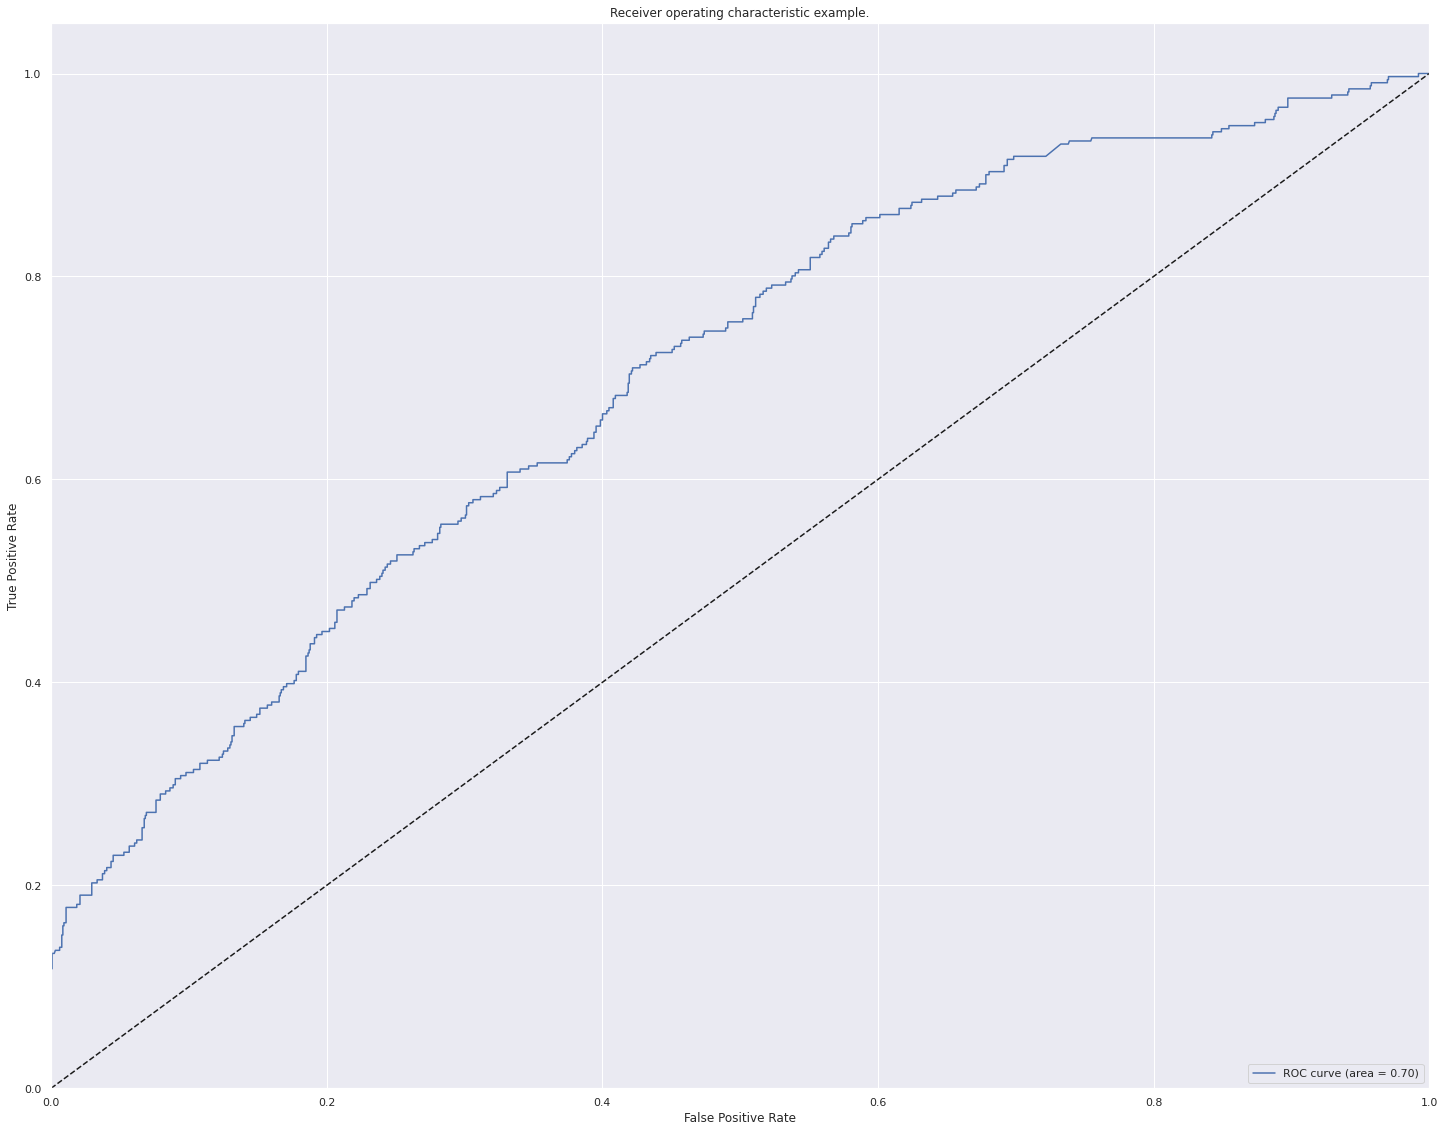

------------------
Puntaje de stars: 
4
------------------


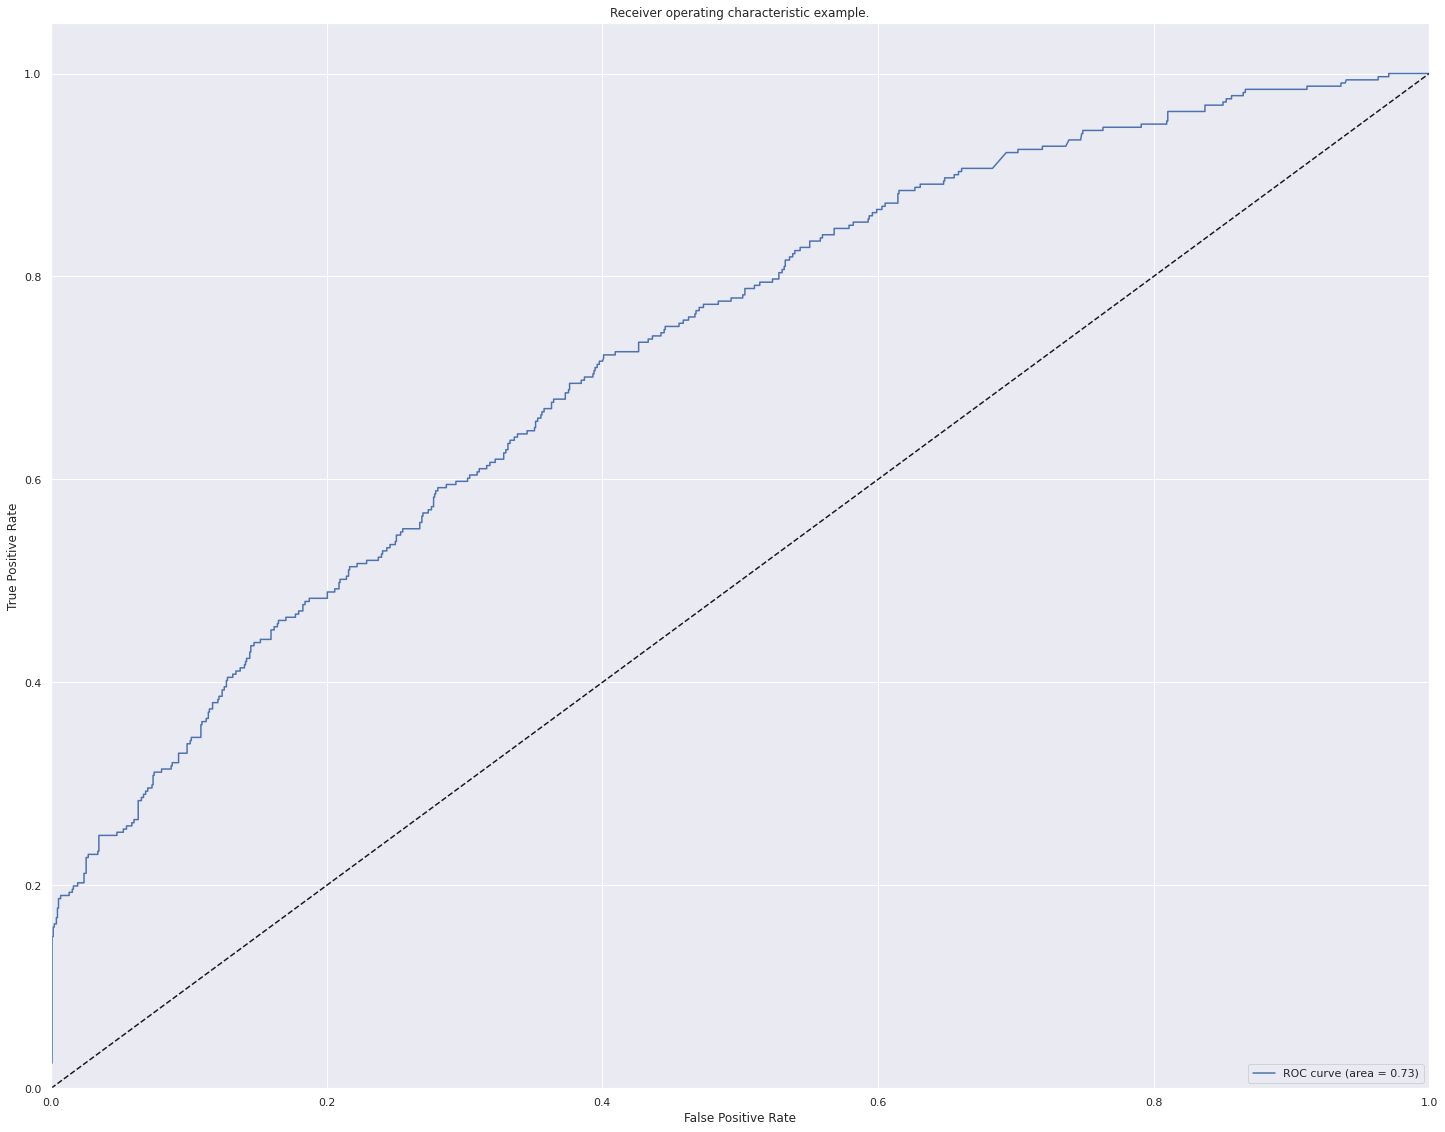

------------------
Puntaje de stars: 
5
------------------


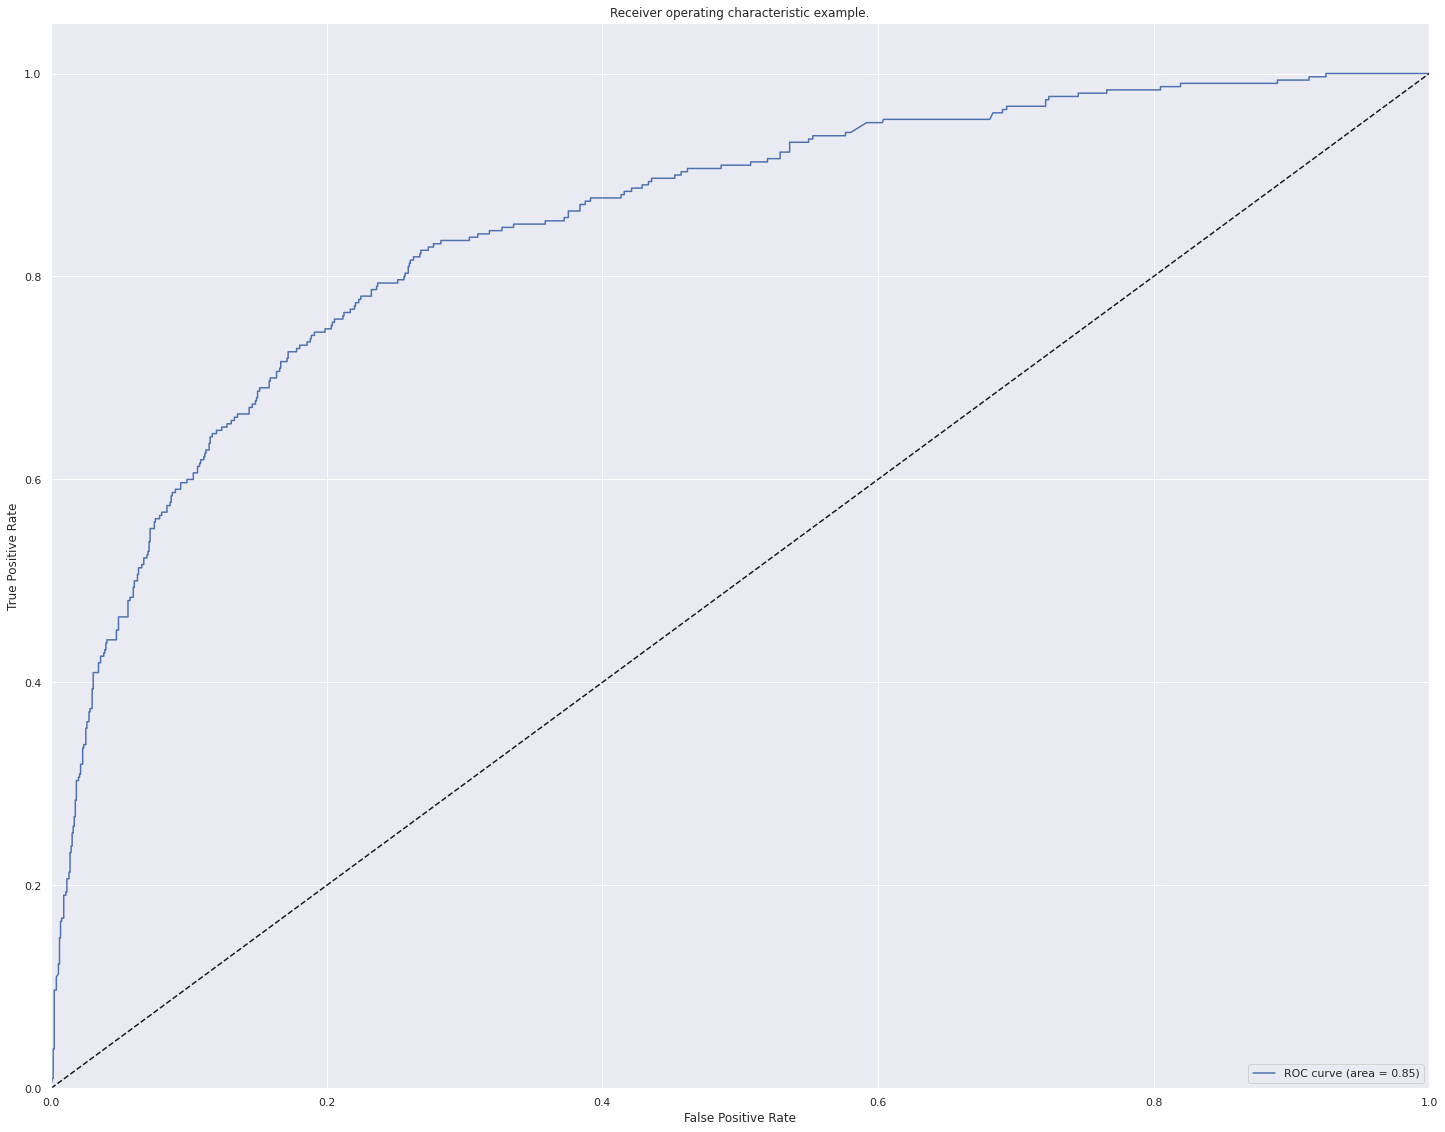

0.78

In [ ]:
#------------------------------
## Análisis ROC AUC Multiclase:
#------------------------------
## Armo los vectores para enrtrenar:
X = matriz_reviews_tf_dfV # Matriz sparse de reviews stemmizados con las 500 o 1000 0 200 palabras con mayor frecuencia.
y = list_stars # Lista de estrellas - Puntajes.

y = label_binarize(y, classes=[1,2,3,4,5])
n_classes = 5


# shuffle and split training and test sets
X_train, X_test, y_train, y_test =\
    train_test_split(X, y, test_size=0.3,random_state=42,stratify=y)

#------------
# classifiers: Chequeo solo en el que me interesa : SVC no lineal:
#------------

# Tomo los mismos que modelé antes:

#clf = OneVsRestClassifier(nb)

#clf = OneVsRestClassifier(svc)

clf = OneVsRestClassifier(svc_non_linear)

#clf = OneVsRestClassifier(XGB)

y_score = clf.fit(X_train, y_train).decision_function(X_test)

#y_score = clf.fit(X_train, y_train).predict_proba(X_test) # para el XGboost y GaussNB

##Compute ROC curve and ROC area for each class

fpr = dict()
tpr = dict()
roc_auc = dict()
for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(y_test[:, i], y_score[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

area = []
# Plot of a ROC curve for a specific class
for i in range(n_classes):
    area.append(roc_auc[i])
    plt.figure()
    plt.plot(fpr[i], tpr[i], label='ROC curve (area = %0.2f)' % roc_auc[i])
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic example.')
    plt.legend(loc="lower right")
    print('------------------')
    print('Puntaje de stars: ')
    print(i+1)
    print('------------------')
    plt.show()

# Calculo el promedio del area bajo la ROC para cada modelo:

np.round(np.average(area),2)

## Resultados de modelos SIN OPTIMIZAR (1) vs OPTIMIZADO EL SVC no lineal:

## 1. Primeras conclusiones del benchmark: Todo esto es con una muestra random sin repetición del 20% del Data Set (si uso el 100% me falla el script por exceso de RAM), y sin sacar PALABRAS REPETIDAS ENTRE CLASES:

- Accuracy por abajo de 50% para el Linear SVC y XGboost: Es esperable por ser un modelos no optimzado. Siguen siendo sensiblemente mejores que el benchmark de Gauss.
- Para los modelos descritos en el punto anterior: Predicen relativamente bien las etiquetas de puntaje 1, > 50%. (True Positives 1-1)
- Predicen de forma regular las etiquetas de puntaje 1, < 67%. (True Positive 5-5)
- Linear SCV: Predice como ciertas un poco por arriba del 60% para el puntaje de stars 1. Tiene sentido porque el data set se rebalanceó por debajo para stars 1. Hace lo mismo para las true positive de stars 5.
- XGBoost: Se pierde un poco la definición de la diagonal (true positives) en comparación con con el LinearSVC, con menor accuracy que el antedicho.
- El proceso de Stemming arroja mejores resulatos en términos de accuracy y diagonal de matriz de confusión que el Lemmatizing (que además es super ineficiente y tarda mucho tiempo en fitear).

# Conclusion 1: 

- XGboost y Linear SVC no cumplen con las espectativas.

## 2. Segundas conclusiones del benchmark: Todo esto es con una muestra random sin repetición del 20% del Data Set (si uso el 100% me falla el script por exceso de RAM), y SACANDO PALABRAS REPETIDAS ENTRE CLASES y el modelo SVC optimizado con un random sarch CV:

Ampliando un poco más el scope a modelos de SVM no Lineales, y comparandolos contra los anteriormente descriptos sumando el criterio de "área bajo la ROC", tenemos los siguientes resultados utilizando tanto técnica de Stemming, como Lemmatizing + TF-IDF:

## Stemming + TF-IDF:
- Gauss NB: 
  - Matriz de confusión: Poco diagonal
  - Accuracy: 0.37
  - Area bajo ROC promedio: 0.6
  - F1 Score: 0.36
- LinearSVC: 
  - Matriz de confusión: Sensiblemente Diagonal
  - Accuracy: 0.44
  - Area bajo ROC promedio: 0.72
  - F1 Score: 0.45
- **Non LinearSVC:**
  - **Matriz de confusión: Sensiblemente diagonal**
  - **Accuracy: 0.48** YA ES MEJOR QUE EL AZAR (1/(5 clases))= 1/5 = 0.2)
  - **Area bajo ROC promedio: 0.77**
  - F1 Score: 0.479
- XGBoost: 
  - Matriz de confusión: Diagonal
  - Accuracy: 0.43
  - Area bajo ROC promedio: 0.74
  - F1 Score: 0.42

## Lemmatizing + TF-IDF:
- Gauss NB: 
  - Matriz de confusión: Poco diagonal
  - Accuracy: 0.38
  - Area bajo ROC promedio: 0.61
  - F1 Score: 0.36
- LinearSVC: 
  - Matriz de confusión: Sensiblemente Diagonal
  - Accuracy: 0.43
  - Area bajo ROC promedio: 0.72
  - F1 Score: 0.44
- Non LinearSVC: 
  - Matriz de confusión: Sensiblemente Diagonal.
  - Accuracy: 0.44
  - Area bajo ROC promedio: 0.76
  - F1 Score: 0.44
- XGBoost: 
  - Matriz de confusión: Diagonal
  - Accuracy: 0.43
  - Area bajo ROC promedio: 0.73
  - F1 Score: 0.4

# Conclusion 2 : 

- El mejor modelo es el SVC no lineal, entrenado con un proceso de Stemming + TF-IDF.
- El proceso de Stemming arroja resulatos ***levemente*** mejores en términos de accuracy, diagonal de matriz de confusión y área bajo la ROC que el Lemmatizing (que además es super ineficiente y tarda mucho tiempo en fitear), comparando resultados entre modelos.
- Voy a buscar optimizar un modelo de SVC entrenado con Stemmer + TF-IDF.
- **Tengo oportunidad de mejora, sobre todo en las etiquetas intermedias.**

## Optimización del modelo:
-  **SVC No Lineal**: Voy a optimizar este modelo, con un un proceso de RandomSearchCV, modelando X con el proceso de Stemming + TF-IDF (arroja mejores resultados a priori que Lemmatizing), usando como criterio **roc_auc**.
- Como nuevo Benchmark voy a tratar de ganarle al modelo **LinearSVC** que mostré antes, como base line mejorar en 10% el àrea bajo la ROC.
- Uso misma métrica de análisis : Congusion matrix + Accuracy + Area bajo al ROC - Busco una diagonal lo más concentrada en % de True positives y un Accuracy que como minimo sea mejor que el asar (50%-50%), una área bajo al ROC que se aproxime a 1, balanceando las curvas para todas las etiquetas.
- Sigo usando el 20% de la data, sino no corre más y saturo la RAM de la sesión.
- Con el modelo no ptimizado ya le gano en accuracy a 1/5 (1/(5 clases)) = 0.2 que es el azar. 
- Busco mejorarlo un poco más.

In [ ]:
## Defino modelo y parámetros para inciar la optimización:

modelo = SVC()

parametros = {"gamma": ['scale','auto'],  # [0.001, 0.01 , 0.1]
              "C": [0.1 , 1 , 2 , 5 , 10],
              "kernel":  ['poly', 'rbf', 'sigmoid'],
              "degree": [1 , 2 , 3 , 4],
              "coef0": [0.1 , 0.01 , 1 , 2 , 3 , 10],
              "class_weight": [None, 'balanced'],
              "break_ties" : [False, True],
              "random_state": [42, None],
              "probability": [True,False]}

# Defino el método:
randm = RandomizedSearchCV(estimator=modelo, scoring = 'accuracy',
                           param_distributions = parametros,
                           cv = 2, n_iter = 5, n_jobs=-1,verbose=1)

# Fiteo: Sobre el data set de "home" con el 20% de la data.

randm.fit(xtrain, ytrain) # Esto tarda 10 minutos en correr.

# Resultados del fiteo:
print(" Resultados del Random Search " )
print(" El mejor estimador en función de la recorrida por params:", randm.best_estimator_)
print(" El mejor score en función de la recorrida por params:", randm.best_score_)
print(" Los mejores Hyperparámetros son:", randm.best_params_)

Fitting 2 folds for each of 5 candidates, totalling 10 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  10 out of  10 | elapsed:  5.0min finished


 Resultados del Random Search 
 El mejor estimador en función de la recorrida por params: SVC(C=5, break_ties=False, cache_size=200, class_weight=None, coef0=1,
    decision_function_shape='ovr', degree=2, gamma='scale', kernel='rbf',
    max_iter=-1, probability=True, random_state=42, shrinking=True, tol=0.001,
    verbose=False)
 El mejor score en función de la recorrida por params: 0.43985161632220454
 Los mejores Hyperparámetros son: {'random_state': 42, 'probability': True, 'kernel': 'rbf', 'gamma': 'scale', 'degree': 2, 'coef0': 1, 'class_weight': None, 'break_ties': False, 'C': 5}


# Resultados finales del armado del modelo:

- Voy a quedarme con el SVC optimizado con los siguientes parámetros:
  - Modelo en variable: "svc_non_linear" (optimizado).
  - Descripción: 
  - SVC(C=5, break_ties=False, cache_size=200, class_weight=None, coef0=1,
    decision_function_shape='ovr', degree=2, gamma='scale', kernel='rbf',
    max_iter=-1, probability=True, random_state=42, shrinking=True, tol=0.001,
    verbose=False)

# ¿Que información está usando el modelo para predecir?
- Conceptualmente, esta usando una matriz X cuyas filas se componen por los vectores obtenidos del vectorizado de TF-IDF de la siguiente forma:
  - Cada una de las 1500 columnas son 1500 palabras (stemmizadas) utilizadas por los compradores para escribir cada review.
  - Cada fila representa una fila por cada review de los productos "home" que fueron los seleccionados, y tiene asociada su puntación o "star".
  - Va a usar las palabras con mayor "peso" o "puntaje" que va a depender de la frecuencia total y frecuencia inversa de ese término en todo el corpus.

# A.1.b) **Data Test EDA**

-------Test Data Set-------

-------------------------------------
Tamaño del data set (5000, 8)
-------------------------------------

-----------------------------------------
Idiomas distintos en el data set ['es']
-----------------------------------------

--------------------------------------
Verticales de productos ['wireless' 'home' 'toy' 'digital_ebook_purchase' 'pc' 'lawn_and_garden'
 'sports' 'camera' 'home_improvement' 'apparel' 'automotive' 'drugstore'
 'electronics' 'other' 'beauty' 'office_product' 'furniture' 'kitchen'
 'shoes' 'video_games' 'personal_care_appliances' 'pet_products' 'book'
 'jewelry' 'watch' 'luggage' 'baby_product' 'industrial_supplies'
 'musical_instruments' 'grocery']
--------------------------------------

-------------------------------
Puntaje de Estrellas [1 2 3 4 5]
-------------------------------

-------------------------------------
Información adicional de la base
-------------------------------------
<class 'pandas.core.frame.DataFrame'>
Ra

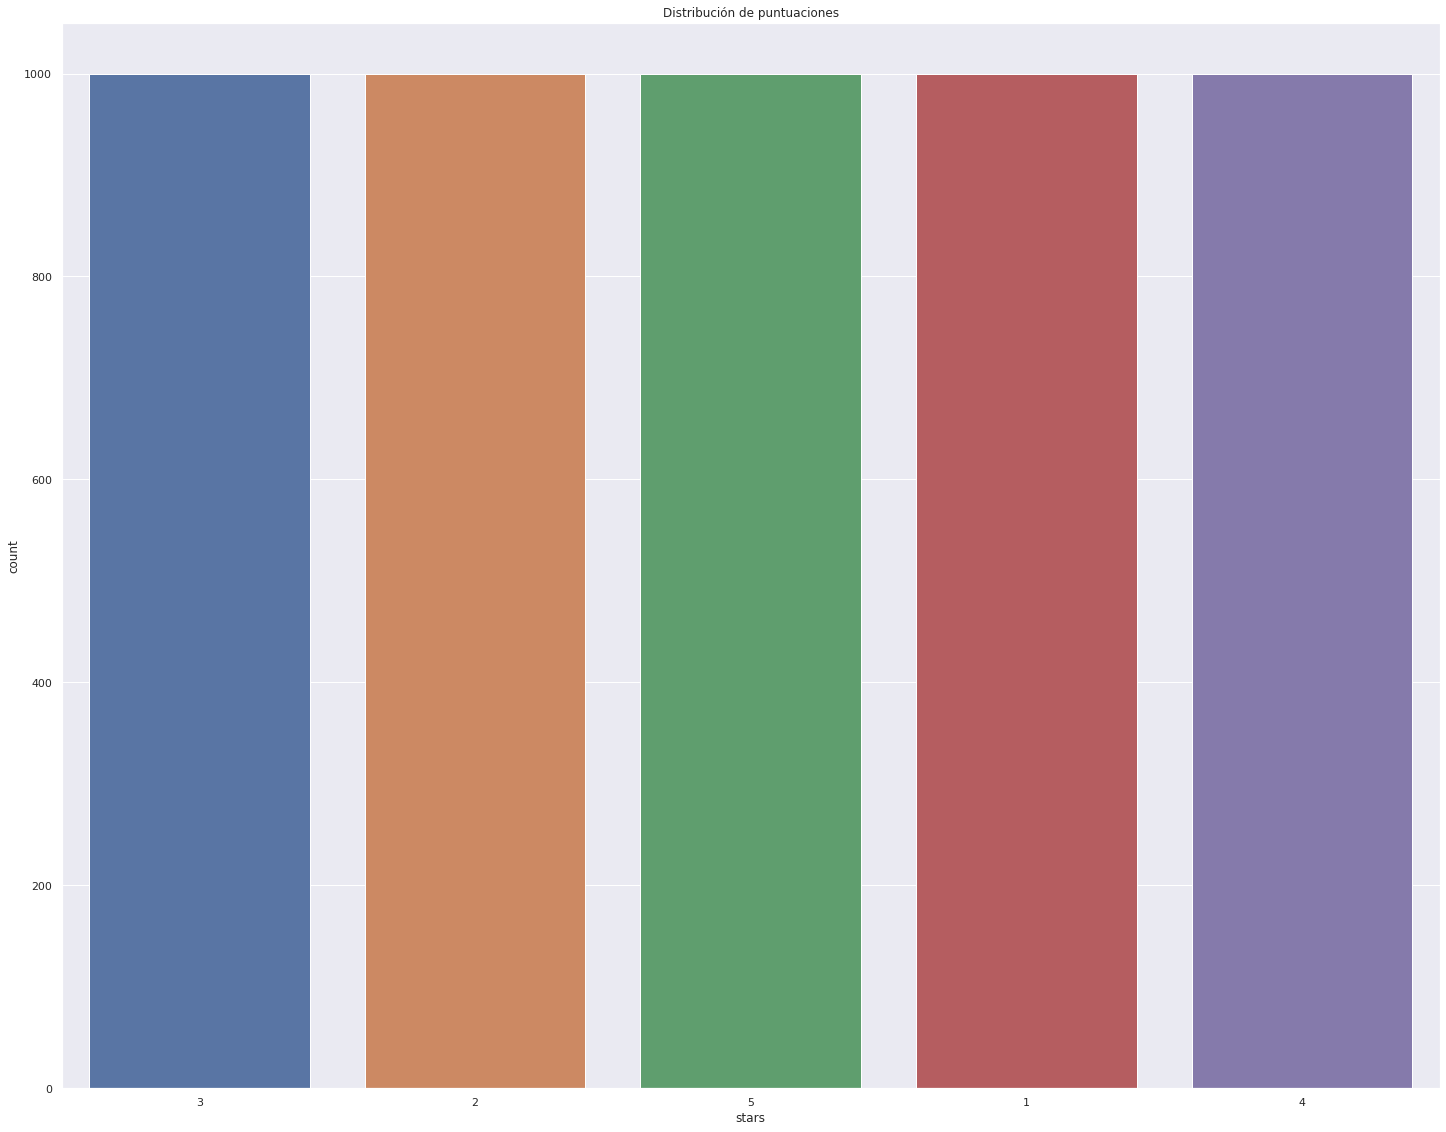

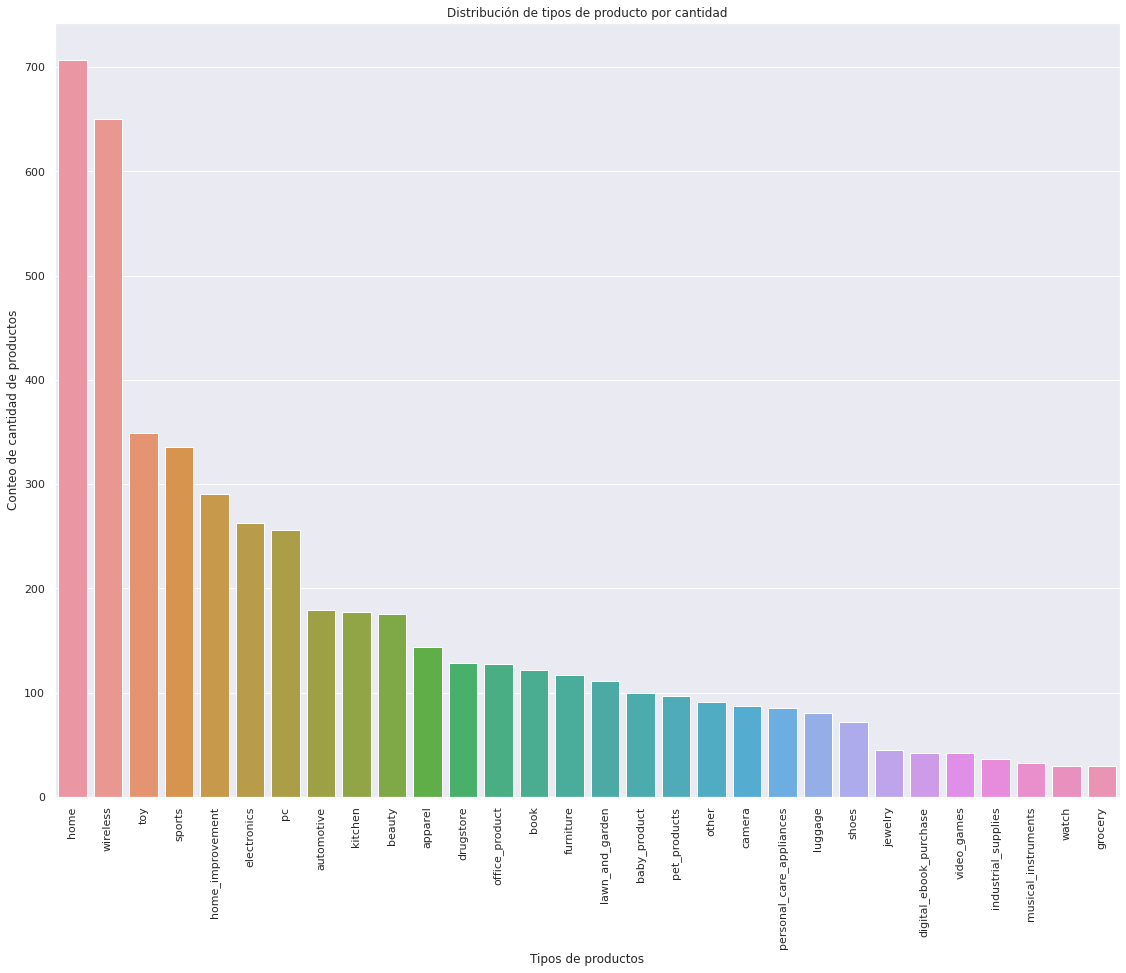

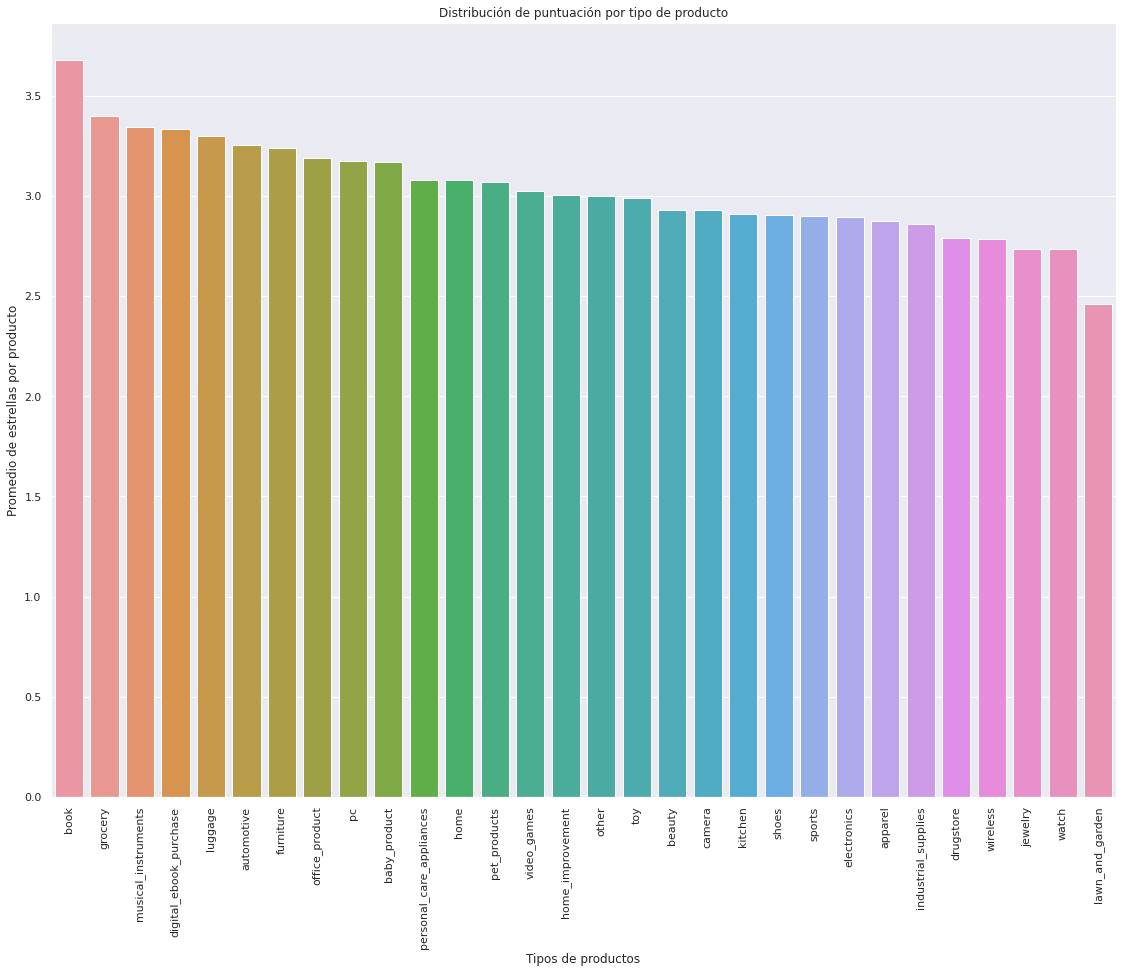

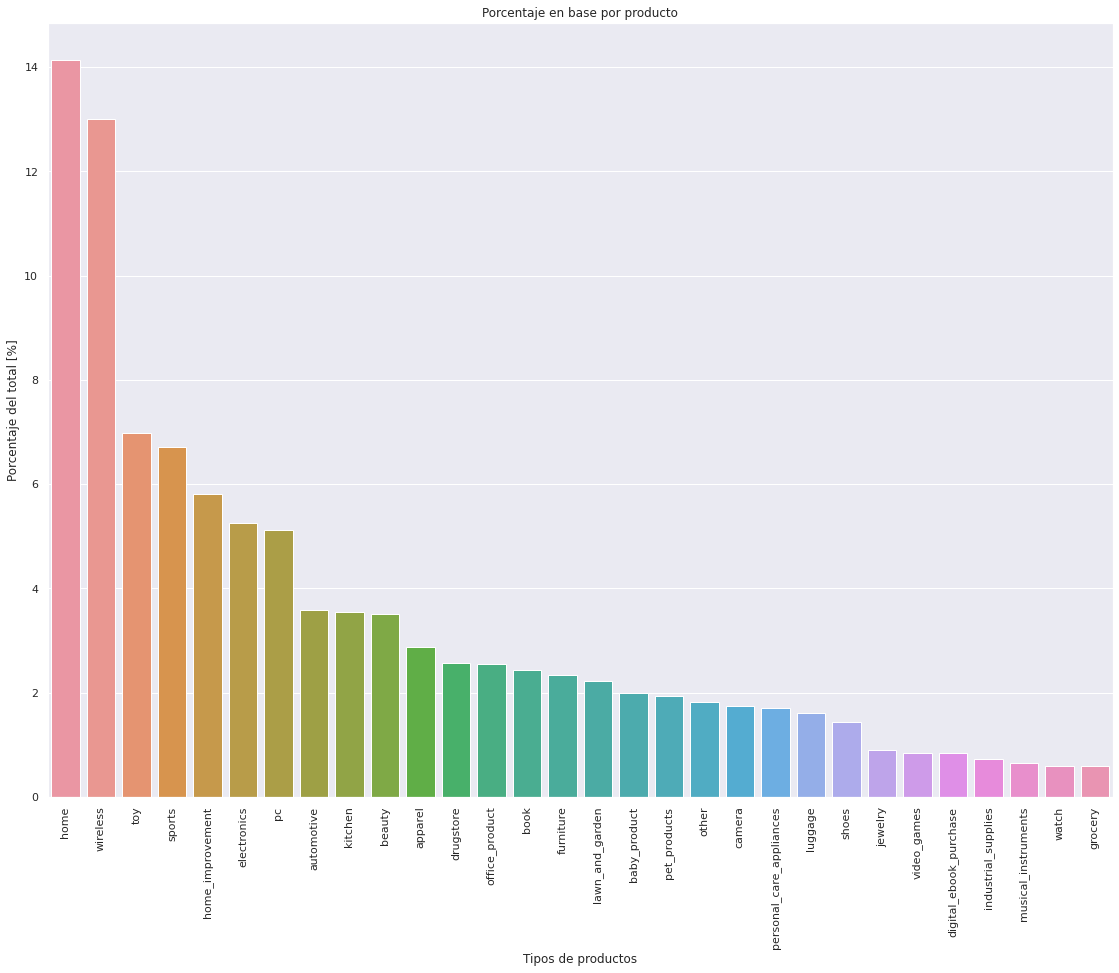

,Producto,Nº total por producto,Porcentaje del total [%]
0,home,707,14.14
1,wireless,650,13.00
2,toy,349,6.98
3,sports,336,6.72
4,home_improvement,290,5.80


In [ ]:
datos = data_test # Carga de datos.
print('-------Test Data Set-------')
print('')
#-------------------------
#Exploro dataset_es_train:
#-------------------------
n_filas = datos.shape[0]                         #Numero de filas en mi data set.
print('-------------------------------------')
print('Tamaño del data set', datos.shape)
print('-------------------------------------')
print('')
idiomas = datos.language.unique()                #Chequeo la cantidad de idiomas distintos de las reviews por las dudas. 
                                                      #(la descripción de los ds en GitHub me generaron dudas).
product_categ = datos.product_category.unique()  #Verifico los tipos de verticales (productos) de productos que hay en las reviews.
                                                      #(la idea es hacer un countplot mas prolijo después)
estrellas = datos.stars.unique()                 #Verifico la cantidad de estrellas.

# Ejecuto los prints de la info que extraje mas arriba:

print('-----------------------------------------')
print('Idiomas distintos en el data set', idiomas)
print('-----------------------------------------')
print('')
print('--------------------------------------')
print('Verticales de productos', product_categ)
print('--------------------------------------')
print('')
print('-------------------------------')
print('Puntaje de Estrellas', estrellas)
print('-------------------------------')
print('')
print('-------------------------------------')
print('Información adicional de la base')
print('-------------------------------------')
info = datos.info();                             #Cheque información adicional del data frame. 
print('')


## Datos faltantes:

# Nombres de las clumnas:
nombre_columnas = datos.columns # Me armo un vector con los nombres de las columnas

print('---------------------------------------------------------------------------------------------------------')
print('Nombres de las columnas ',nombre_columnas)  # Imprimo los nombres para mirar como los indica.
print('---------------------------------------------------------------------------------------------------------')

bool_mat = datos.isna() # Crea data frame de booleans donde un true es un blank y un false es que existe un dato.

#Ahora voy recorriendo con un for loop el nombre de cada columna y sumo todos los faltantes en cada columna. 

for nombre in nombre_columnas: # Voy iterando el nombre del vector nombre_columnas con un for.
    print('Falantes en: ',nombre,': ',sum(bool_mat[nombre]),' valores.')

print('')
## Exploración gráfica: 
scale = 5 #escala de los gráficos.
#La idea acá es tener una visualización cuantitativa de las columnas que describen al data set:

## Distribución de la puntuación.
plt.figure()
sns.set(rc={'figure.figsize':(12+scale,8.27+scale)})
plt.title('Distribución de puntuaciones')
sns.countplot(x = "stars", data = datos, order = datos["stars"].value_counts().index)

## Distribución por tipos de productos:
plt.figure()
sns.set(rc={'figure.figsize':(12+scale,8.27+scale)})
sns.countplot(x = "product_category", data = datos, order = datos["product_category"].value_counts().index)
plt.xticks(rotation = 90)       # Roto las etiquetas para que se vea.
plt.title('Distribución de tipos de producto por cantidad')
plt.xlabel('Tipos de productos')
plt.ylabel('Conteo de cantidad de productos')
plt.show()

# Cuento la cantidad total por tipos de producto:
cantidad = []
for producto in product_categ:
  prod_total = datos[(datos['product_category']==producto)].shape[0]
  cantidad.append(prod_total)

myList = cantidad
myInt = n_filas
newList = [round((x / myInt)*100,2) for x in myList]

c = {'Producto': product_categ, 'Nº total por producto': myList,'Porcentaje del total [%]': newList}
data_tot = pd.DataFrame(c)
data_tot = data_tot.sort_values(by=['Porcentaje del total [%]'], ascending=False, ignore_index=True)

## Distribución de puntuaciones promedio por tipo de producto:

#Calculo los promedios de pubntaje para cada producto:
promedios = []
for producto in product_categ:
    data_prod = datos[(datos['product_category']==producto)]
    prom = data_prod['stars'].mean()
    promedios.append(prom)

d = {'Producto': product_categ, 'Puntaje promedio': promedios}
data_proms = pd.DataFrame(d)
data_proms = data_proms.sort_values(by=['Puntaje promedio'], ascending =False, ignore_index=True)

## Graficos totales y promedios:

plt.figure()
sns.set(rc={'figure.figsize':(12+scale,8.27+scale)})
sns.barplot(x = 'Producto', y = 'Puntaje promedio', data = data_proms)
plt.xticks(rotation = 90)       # Roto las etiquetas para que se vea.
plt.title('Distribución de puntuación por tipo de producto')
plt.xlabel('Tipos de productos')
plt.ylabel('Promedio de estrellas por producto')
plt.show()

plt.figure()
sns.set(rc={'figure.figsize':(12+scale,8.27+scale)})
sns.barplot(x = 'Producto', y = 'Porcentaje del total [%]', data = data_tot)
plt.xticks(rotation = 90)       # Roto las etiquetas para que se vea.
plt.title('Porcentaje en base por producto')
plt.xlabel('Tipos de productos')
plt.ylabel('Porcentaje del total [%]')
plt.show()

## Visualizo heads de cada df:
#datos.head()                         ## No aporta mucha info.
#datos.tail()                         ## No aporta mucha info.
#data_proms.head()
data_tot.head()

## NOTA:
# TENGO QUE ELEGIR CON QUE TIPO DE PRODUCTO ME QUEDO, O SI LO HAGO CON TODOS Y DESPUES QUE BSAE DE DATOS USO.

## Primeras conclusiones de la base **data_test**:
- Contiene reviews de un solo idioma: ***español***
- Se puntea con estrellas de **1 a 5**.
- El data set no tiene ***valores faltanes***.
- La distribución de los puntajes es estrellas es uniforme:
    - Esto quiere decir que los puntajes de estrellas están balanceados en el data set (Misma cantidad de 1,2,3,4,y,5).
- Existen reviews de 30 productos diferentes (30 categorías o ***verticales*** distintas):
    - La vertical más numerosa es "home" con el 14.1% del total. La siguen "wireless" con el 13%, "toy" con el 6.98%, "sports" con el 6.72% y "home_improvement" con el 5.8%.
    - En este aspecto tiene una difrencia con el data set de entranamiento. No tiene el mismo ordenamiento en terminos de % del total en cantidad, del global del data set. Esto podría ser beneficioso a la hora de testear el modelo y verificar si puede lidiar con un data set que es distinto.

- No presenta valores faltantes.

# Testeo (Cross validation) del modelo optimizado en el punto anterior: SVC No lineal.
- Mi objetivo en esta sección es el de hacer una cross validation para testear el modelo que optimicé en el punto anterior.
- Para eso voy a corre nuevamente el proceso de stemming (dado que mi modelo entiende eso), y luego correr una cross validation para validar el accuracy de mi modelo antes de ponerlo a predecir con el Data Set de Dev (yo considero que este es el de deployment).


## Proceso de Stemming:
- Al modelo tengo que alimentarlo con un stemming (asi lo entrenamos).
- Tengo que generar X para alimentarlo (con el stemming que hice antes).

In [ ]:
## Repito el proceso de stemming para preparar el DS para hacer el cross validation con el modelo:
## Como entrené solo con HOME, cross valido solo con HOME.

data_CV = data_test[(data_test['product_category'] == 'home')]

## Voy a tener que tomar una porción menor del data set porque los modelos y
## procesos de lemmatizing no funcionan bien:

#percent = 0.2 # Elijo el 20% del Data Set: De otra forma la corrida tarda mucho y mequedo sin RAM.
#data = data.sample(frac = percent, replace = True, axis = 'index') # Selecciono un 20% random de la data para hacer proceso de Lemma y Stemm, y generar el modelo con el mejor método.
#print(data.shape) 
#data.head()

#----------------------------------------------------------------------------
## Repito el proceso anterior para desvincularlo del proceso de EDA: Stemming
#---------------------------------------------------------------------------- 
data = data_CV[['review_body','stars']]   #Me quedo con el cuerpo de la review y el puntaje.

## Defino las herramientas de stemmizado y tokenizado:
spanish_stemmer = SnowballStemmer('spanish')
tokenizer = RegexpTokenizer(r'\w+') #r'\w+' #Inicializo tokenizador.

## Proceso todos los reviews:

todos_los_reviews_stemm= []

for i in range(data.shape[0]):
    review = data['review_body'].iloc[i]                       #seleccionar cada review
    review = review.lower()                                    #Normalizo pasando a minusculas.
    review = re.sub(r'\d+','', review)                         #Me saco los numeros de ensima.
    review =  tokenizer.tokenize(review)                       #Tokenizar con RegexpTokenizer
    # Filtrar por stopwords
    review_sin_sw = []
    for palabra in review:
        if palabra not in stops:
           review_sin_sw.append(palabra)
    review = [palabra for palabra in review_sin_sw if (palabra not in ("producto","bien","buena","precio","producto","calidad","bastante","llegado","aunque") and len(palabra)>3)] #Elimino las palabras de menos de 2 letras y la que más se repiten entre reviews.
    #Stemizado de los reviews.
    review = [spanish_stemmer.stem(w) for w in review]         
    review = " ".join(review)
    todos_los_reviews_stemm.append(review) #agregar el resultado a la lista

## Agrego la culumna de reviwes stemmizados al data set original:
data["review_stemm"] = todos_los_reviews_stemm
data_model_test_stemm_CV = data[['review_stemm','stars']]
data_model_test_stemm_CV.dropna(axis=0,inplace=True)  # Por si quedaron titulares vacios
print(data_model_test_stemm_CV.shape) 
data_model_test_stemm_CV.head()

## Paso reviews Stemmizados y pubtajes re balabceados a listas:

list_reviews = list(data_model_test_stemm_CV['review_stemm'].values) # Para armar la variable X
list_stars = data_model_test_stemm_CV['stars'].values # Para armar la variable target Y

##-------------------------------------------
## Armado de matriz:
# Voy a probar dos tecnicas de vectorización:
##-------------------------------------------
max_features = 1500 # Usaremos solo las 1000 o 2000 palabras con mas frecuencia en todo el corpus para generar los vectores
tf_dfV  = TfidfVectorizer(max_features=max_features,sublinear_tf=True, min_df=5, norm='l2', ngram_range=(1,3)) # Uso esta técnica sobre la CountVectorizer porque introduce más información.
matriz_reviews_tf_dfV  = tf_dfV.fit_transform(list_reviews)
	                                                   
## Armo los vectores para crossvalidar:
x = matriz_reviews_tf_dfV.toarray() # Matriz sparse de reviews stemmizados con las 500 o 1000 0 200 palabras con mayor frecuencia.
y = list_stars # Lista de estrellas - Puntajes.


(707, 2)


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:44: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:46: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


In [ ]:
# CV model:
modelo = svc_non_linear
kfold = KFold(n_splits=10, random_state=7,shuffle=True)
results = cross_val_score(modelo, x, y, cv=kfold)

print("Accuracy: %.2f%% (%.2f%%)" % (results.mean()*100, results.std()*100))

Accuracy: 35.09% (4.66%)


## Conclusiones del CV:
- Accuracy superior a 0.2% ----> 35.09% con un desvío std del 4.66%. En el mejor de los casos obtengo 40% de acuracy.
- Se puede mejorar, pero el modelo es satisfactorio en terminos de predecir data que nunca vió.
- Pruebo deploy final con el DEV data set y escribo conlcusiones finales.

# A.1.c) **Data dev EDA**

-------Dev Data Set-------

-------------------------------------
Tamaño del data set (5000, 8)
-------------------------------------

-----------------------------------------
Idiomas distintos en el data set ['es']
-----------------------------------------

--------------------------------------
Verticales de productos ['wireless' 'apparel' 'sports' 'home_improvement' 'beauty' 'home'
 'baby_product' 'pc' 'toy' 'book' 'personal_care_appliances' 'kitchen'
 'lawn_and_garden' 'pet_products' 'drugstore' 'office_product' 'furniture'
 'electronics' 'automotive' 'shoes' 'jewelry' 'luggage' 'camera'
 'industrial_supplies' 'other' 'musical_instruments' 'grocery'
 'digital_ebook_purchase' 'video_games' 'watch']
--------------------------------------

-------------------------------
Puntaje de Estrellas [1 2 3 4 5]
-------------------------------

-------------------------------------
Información adicional de la base
-------------------------------------
<class 'pandas.core.frame.DataFrame'>
Ran

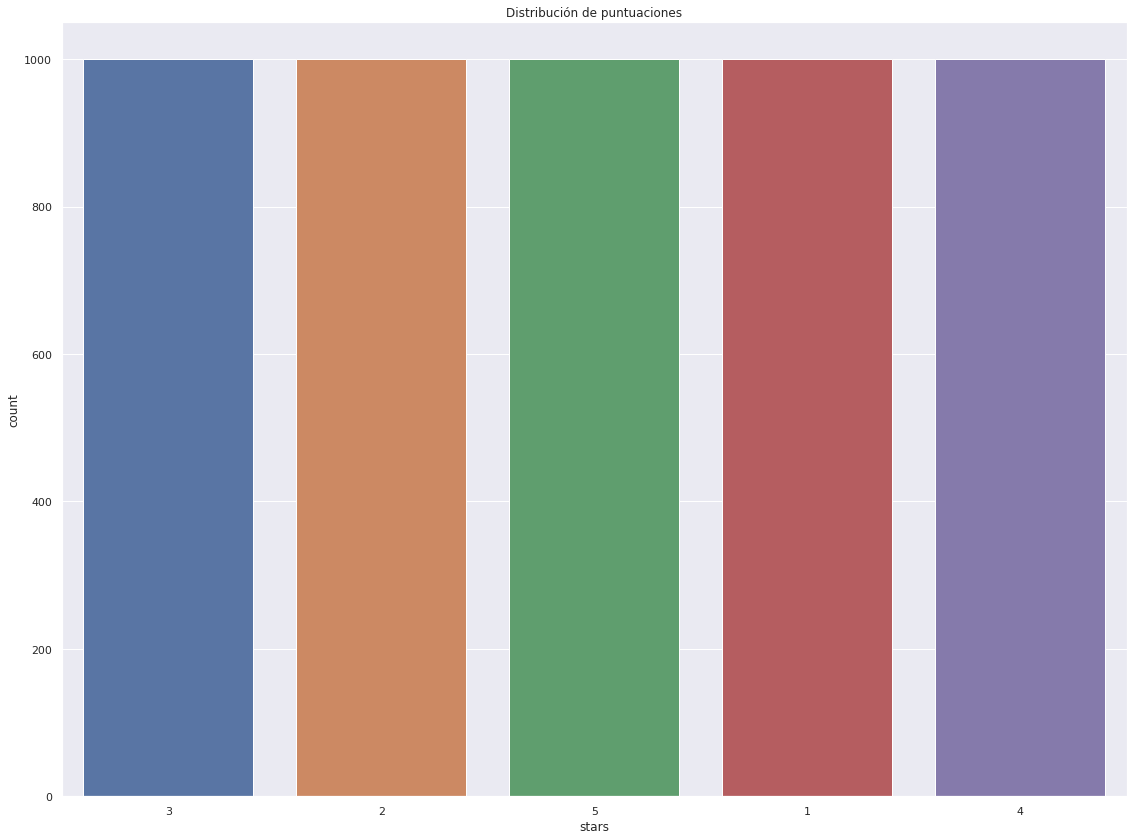

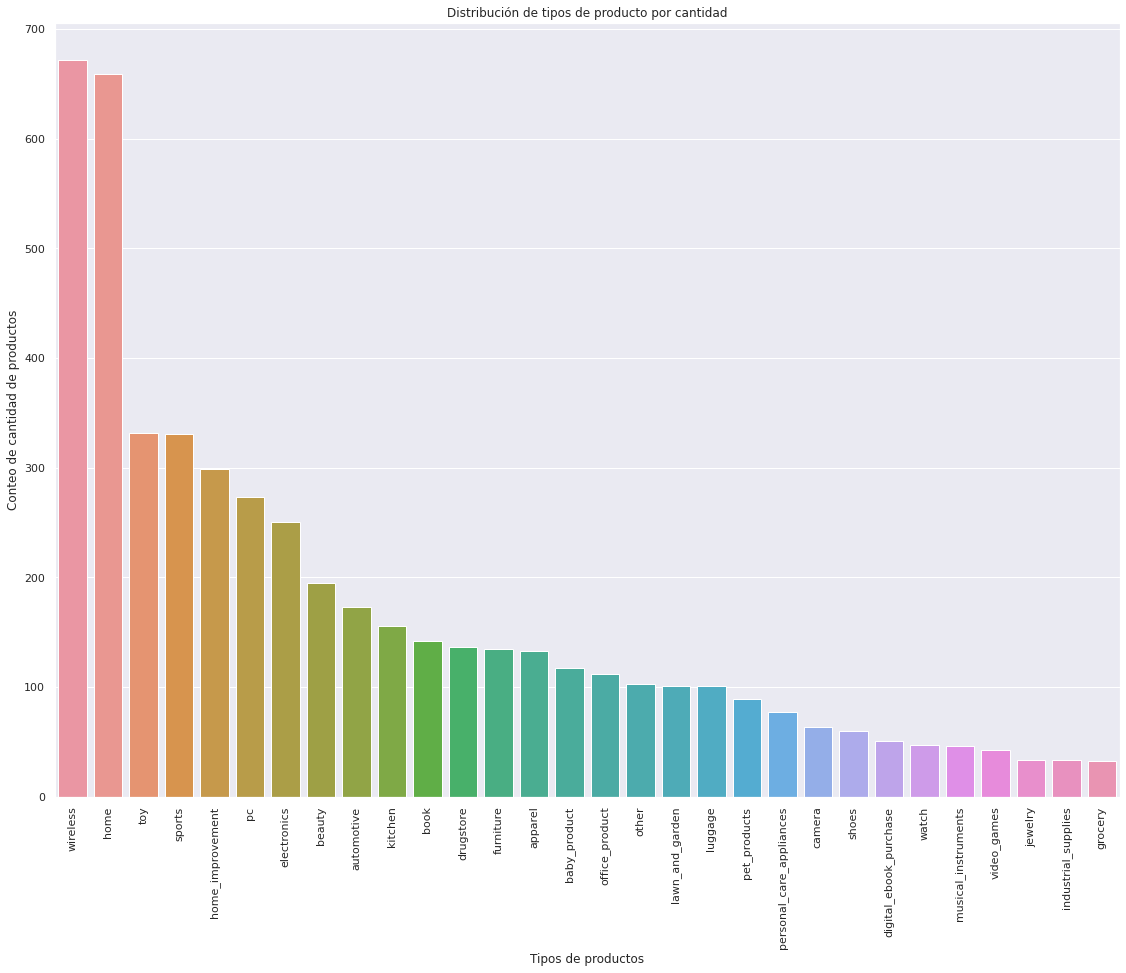

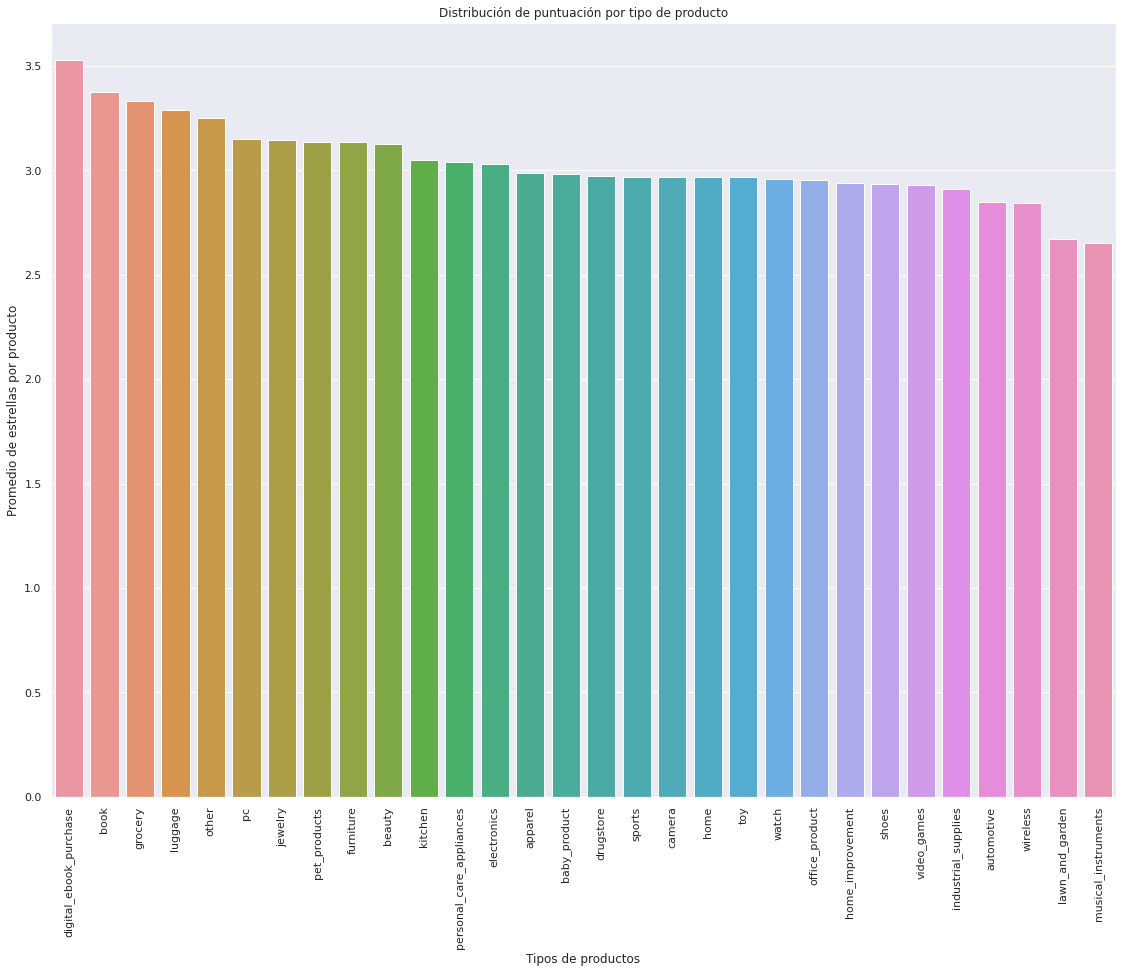

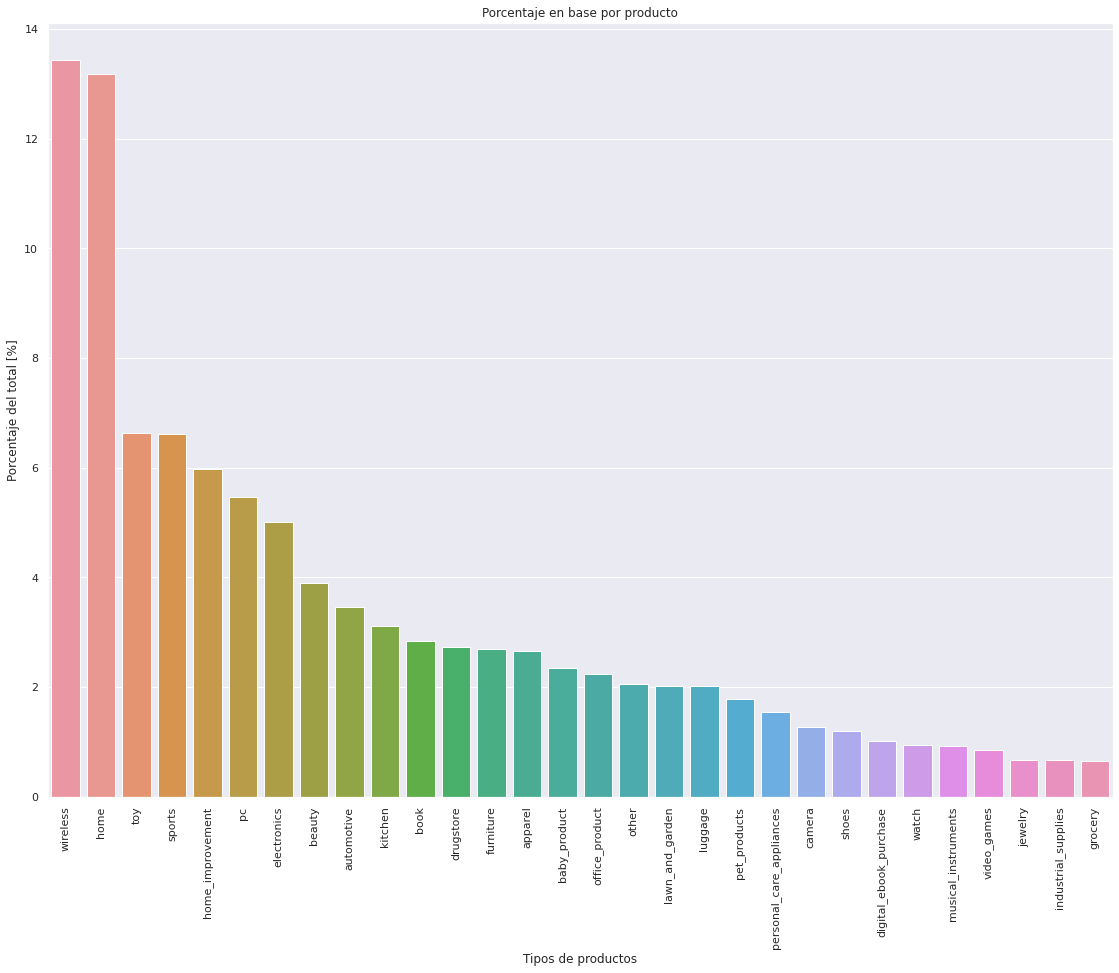

,Producto,Nº total por producto,Porcentaje del total [%]
0,wireless,672,13.44
1,home,659,13.18
2,toy,332,6.64
3,sports,331,6.62
4,home_improvement,299,5.98


In [ ]:
datos = data_dev # Carga de datos.
print('-------Dev Data Set-------')
print('')
#-------------------------
#Exploro dataset_es_train:
#-------------------------
n_filas = datos.shape[0]                         #Numero de filas en mi data set.
print('-------------------------------------')
print('Tamaño del data set', datos.shape)
print('-------------------------------------')
print('')
idiomas = datos.language.unique()                #Chequeo la cantidad de idiomas distintos de las reviews por las dudas. 
                                                      #(la descripción de los ds en GitHub me generaron dudas).
product_categ = datos.product_category.unique()  #Verifico los tipos de verticales (productos) de productos que hay en las reviews.
                                                      #(la idea es hacer un countplot mas prolijo después)
estrellas = datos.stars.unique()                 #Verifico la cantidad de estrellas.

# Ejecuto los prints de la info que extraje mas arriba:

print('-----------------------------------------')
print('Idiomas distintos en el data set', idiomas)
print('-----------------------------------------')
print('')
print('--------------------------------------')
print('Verticales de productos', product_categ)
print('--------------------------------------')
print('')
print('-------------------------------')
print('Puntaje de Estrellas', estrellas)
print('-------------------------------')
print('')
print('-------------------------------------')
print('Información adicional de la base')
print('-------------------------------------')
info = datos.info();                             #Cheque información adicional del data frame. 
print('')


## Datos faltantes:

# Nombres de las clumnas:
nombre_columnas = datos.columns # Me armo un vector con los nombres de las columnas

print('---------------------------------------------------------------------------------------------------------')
print('Nombres de las columnas ',nombre_columnas)  # Imprimo los nombres para mirar como los indica.
print('---------------------------------------------------------------------------------------------------------')

bool_mat = datos.isna() # Crea data frame de booleans donde un true es un blank y un false es que existe un dato.

#Ahora voy recorriendo con un for loop el nombre de cada columna y sumo todos los faltantes en cada columna. 

for nombre in nombre_columnas: # Voy iterando el nombre del vector nombre_columnas con un for.
    print('Falantes en: ',nombre,': ',sum(bool_mat[nombre]),' valores.')

print('')
## Exploración gráfica: 
scale = 5 #escala de los gráficos.
#La idea acá es tener una visualización cuantitativa de las columnas que describen al data set:

## Distribución de la puntuación.
plt.figure()
sns.set(rc={'figure.figsize':(12+scale,8.27+scale)})
plt.title('Distribución de puntuaciones')
sns.countplot(x = "stars", data = datos, order = datos["stars"].value_counts().index)

## Distribución por tipos de productos:
plt.figure()
sns.set(rc={'figure.figsize':(12+scale,8.27+scale)})
sns.countplot(x = "product_category", data = datos, order = datos["product_category"].value_counts().index)
plt.xticks(rotation = 90)       # Roto las etiquetas para que se vea.
plt.title('Distribución de tipos de producto por cantidad')
plt.xlabel('Tipos de productos')
plt.ylabel('Conteo de cantidad de productos')
plt.show()

# Cuento la cantidad total por tipos de producto:
cantidad = []
for producto in product_categ:
  prod_total = datos[(datos['product_category']==producto)].shape[0]
  cantidad.append(prod_total)

myList = cantidad
myInt = n_filas
newList = [round((x / myInt)*100,2) for x in myList]

c = {'Producto': product_categ, 'Nº total por producto': myList,'Porcentaje del total [%]': newList}
data_tot = pd.DataFrame(c)
data_tot = data_tot.sort_values(by=['Porcentaje del total [%]'], ascending=False, ignore_index=True)

## Distribución de puntuaciones promedio por tipo de producto:

#Calculo los promedios de pubntaje para cada producto:
promedios = []
for producto in product_categ:
    data_prod = datos[(datos['product_category']==producto)]
    prom = data_prod['stars'].mean()
    promedios.append(prom)

d = {'Producto': product_categ, 'Puntaje promedio': promedios}
data_proms = pd.DataFrame(d)
data_proms = data_proms.sort_values(by=['Puntaje promedio'], ascending =False, ignore_index=True)

## Graficos totales y promedios:

plt.figure()
sns.set(rc={'figure.figsize':(12+scale,8.27+scale)})
sns.barplot(x = 'Producto', y = 'Puntaje promedio', data = data_proms)
plt.xticks(rotation = 90)       # Roto las etiquetas para que se vea.
plt.title('Distribución de puntuación por tipo de producto')
plt.xlabel('Tipos de productos')
plt.ylabel('Promedio de estrellas por producto')
plt.show()

plt.figure()
sns.set(rc={'figure.figsize':(12+scale,8.27+scale)})
sns.barplot(x = 'Producto', y = 'Porcentaje del total [%]', data = data_tot)
plt.xticks(rotation = 90)       # Roto las etiquetas para que se vea.
plt.title('Porcentaje en base por producto')
plt.xlabel('Tipos de productos')
plt.ylabel('Porcentaje del total [%]')
plt.show()

## Visualizo heads de cada df:
#datos.head()                         ## No aporta mucha info.
#datos.tail()                         ## No aporta mucha info.
#data_proms.head()
data_tot.head()

## NOTA:
# TENGO QUE ELEGIR CON QUE TIPO DE PRODUCTO ME QUEDO, O SI LO HAGO CON TODOS Y DESPUES QUE BSAE DE DATOS USO.

# Primeras conclusiones de la base **data_dev**:
- Contiene reviews de un solo idioma: ***español***
- Se puntea con estrellas de **1 a 5**.
- El data set no tiene ***valores faltanes***.
- La distribución de los puntajes es estrellas es uniforme:
    - Esto quiere decir que los puntajes de estrellas están balanceados en el data set (Misma cantidad de 1,2,3,4,y,5).
- Existen reviews de 30 productos diferentes (30 categorías o ***verticales*** distintas):
    - La vertical más numerosa es "wireless" con el 13.44% del total. La siguen "home" con el 13.18%, "toy" con el 6.64%, "sports" con el 6.62.5% y "home improvement" con el 5.6%.
    - En esta métrica, similar al data set anterior. Hay que tener cuidado cuando se vaya a validar el modelo con este data set, dado que se puede tener un sesgo de similitud al utilizar ambos data set similares.

- No presenta valores faltantes.

## Preducciones en deployment:
- Uso confusion matrix contra todas las etiquetas de "home"
- Uso el resto de las metricas conta todas las etiquetas de "home".

In [ ]:
## Repito el proceso de stemming para preparar el DS para hacer el cross validation con el modelo:
## Como entrené solo con HOME, cross valido solo con HOME.
data = data_dev[(data_dev['product_category'] == 'home')]

## Voy a tener que tomar una porción menor del data set porque los modelos y
## procesos de lemmatizing no funcionan bien:

#percent = 0.2 # Elijo el 20% del Data Set: De otra forma la corrida tarda mucho y mequedo sin RAM.
#data = data.sample(frac = percent, replace = True, axis = 'index') # Selecciono un 20% random de la data para hacer proceso de Lemma y Stemm, y generar el modelo con el mejor método.
#print(data.shape) 
#data.head()

#----------------------------------------------------------------------------
## Repito el proceso anterior para desvincularlo del proceso de EDA: Stemming
#---------------------------------------------------------------------------- 
data_devv = data[['review_body','stars']]   #Me quedo con el cuerpo de la review y el puntaje.

## Defino las herramientas de stemmizado y tokenizado:
spanish_stemmer = SnowballStemmer('spanish')
tokenizer = RegexpTokenizer(r'\w+') #r'\w+' #Inicializo tokenizador.

## Proceso todos los reviews:

todos_los_reviews_stemm= []

for i in range(data.shape[0]):
    review = data_devv['review_body'].iloc[i]                       #seleccionar cada review
    review = review.lower()                                    #Normalizo pasando a minusculas.
    review = re.sub(r'\d+','', review)                         #Me saco los numeros de ensima.
    review =  tokenizer.tokenize(review)                       #Tokenizar con RegexpTokenizer
    # Filtrar por stopwords
    review_sin_sw = []
    for palabra in review:
        if palabra not in stops:
           review_sin_sw.append(palabra)
    review = [palabra for palabra in review_sin_sw if (palabra not in ("producto","bien","buena","precio","producto","calidad","bastante","llegado","aunque") and len(palabra)>3)] #Elimino las palabras de menos de 2 letras y la que más se repiten entre reviews.
    #Stemizado de los reviews.
    review = [spanish_stemmer.stem(w) for w in review]         
    review = " ".join(review)
    todos_los_reviews_stemm.append(review) #agregar el resultado a la lista

## Agrego la culumna de reviwes stemmizados al data set original:
data_devv["review_stemm"] = todos_los_reviews_stemm
data_model_dev_stemm = data_devv[['review_stemm','stars']]
data_model_dev_stemm.dropna(axis=0,inplace=True)  # Por si quedaron titulares vacios
print(data_model_dev_stemm.shape) 
data_model_dev_stemm.head()

## Paso reviews Stemmizados y pubtajes re balabceados a listas:

list_reviews = list(data_model_dev_stemm['review_stemm'].values) # Para armar la variable X
list_stars = data_model_dev_stemm['stars'].values # Para armar la variable target Y

##-------------------------------------------
## Armado de matriz:
# Voy a probar dos tecnicas de vectorización:
##-------------------------------------------
max_features = 1500 # Usaremos solo las 1000 o 2000 palabras con mas frecuencia en todo el corpus para generar los vectores
tf_dfV  = TfidfVectorizer(max_features=max_features, ngram_range=(1,3)) # Uso esta técnica sobre la CountVectorizer porque introduce más información.
matriz_reviews_tf_dfV  = tf_dfV.fit_transform(list_reviews)
	                                                   
## Armo los vectores para crossvalidar:
x = matriz_reviews_tf_dfV.toarray() # Matriz sparse de reviews stemmizados con las 500 o 1000 0 200 palabras con mayor frecuencia.
y = list_stars # Lista de estrellas - Puntajes.

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:43: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:45: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


(659, 2)


In [ ]:
data_model_dev_stemm

,review_stemm,stars
5,hol despues recog paquet bol rot,1
6,part pod eleg color envi cest color imagin apr...,1
11,mes despues amazon deb convert mercadill vende...,1
12,funcion recog absolut recom absolut gast diner...,1
14,primer dias despues sup suelt hab usad casi,1
...,...,...
4950,total muestr fot describ tej fuert pelit gordi...,5
4956,convenc decid prob puntuacion recib tiemp rela...,5
4960,buen gust recomend figur sal trasparent defin ...,5
4975,excelent bandej utiliz laptop dimension correc...,5


In [ ]:
# CV model:
modelo = svc_non_linear
kfold = KFold(n_splits=10, random_state=7,shuffle=True)
results = cross_val_score(modelo, x, y, cv=kfold)

print("Accuracy en CV DEV: %.2f%% (%.2f%%)" % (results.mean()*100, results.std()*100))

Accuracy en CV DEV: 35.51% (4.23%)


Support Vector Classifier No Lineal


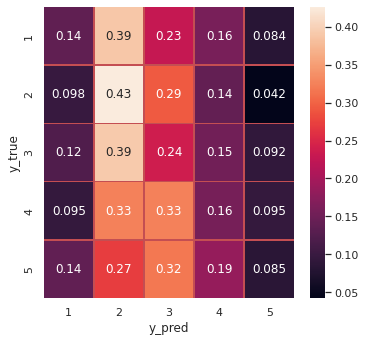

acc :  0.21396054628224584
F1 Score:  0.19663061257759584
              precision    recall  f1-score   support

           1       0.23      0.14      0.17       131
           2       0.26      0.43      0.32       143
           3       0.17      0.24      0.20       130
           4       0.19      0.16      0.17       126
           5       0.21      0.09      0.12       129

    accuracy                           0.21       659
   macro avg       0.21      0.21      0.20       659
weighted avg       0.21      0.21      0.20       659



In [ ]:
## Predigo:

#-----------------
## svc Non Linear:
#-----------------
print('Support Vector Classifier No Lineal')
y_pred_svcnl = svc_non_linear.predict(x)
confusion(y,y_pred_svcnl)

print("acc : ",accuracy_score(y, y_pred_svcnl))
print("F1 Score: ", f1_score(y, y_pred_svcnl, average='macro'))
print(classification_report(y, y_pred_svcnl))

## Conclusiones finales:

- El modelo no se termina comportando como se espera, a pesar de ser entrenado con buenas métricas en general y siendo sensiblemente mejor que los modelos benchmark y el azar.
- Predice el data set de DEV un poco mejor que el azar.
- A nivel CV de dev, la accuracy no es mala. Es muy parecida a la obtenida con el data set de test.

## Investigación:

- Preguntas hasta ahora, en función a los resultados:
  - ¿Porque no logra el modelo armado diagonalizar la matriz de confusión?
  - ¿Porque el CV arroja 35.51% de accuracy en dev, pero la predicción no es mejor que el azar?

- Flujo de trabajo propuesto para responder esas preguntas:
  - Análisis exploratorio profundio (word count, o word colud) de las palabras que se usan en los reviews del data set de dev, y ver en que se diferencia con los otros dos data sets para intentar responder la pregunta anterior.
  - Tratar de darle un poco más de info al modelo desde test (matrix X con más de 1500 features): Para eso necesitamos más potencia de cálculo, posiblemente obteniendo una licencia temporal de una máquina virtual en google cloud.